<h1 style="color:red">                   MINI PROJECT (XEBIA)         </h1>

<h2 style="color:blue">PROBLEM STATEMENT:-</h2>

<h3 style="color:green">Clustering the countries by performing K-means and Hiearchial Clustering Algorithms.</h3>

Import the libraries need to build the model

In [2]:
import numpy as nm       
import pandas as pd  
import warnings 
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
%matplotlib inline
import seaborn as sns
import os
pd.set_option('display.max_rows', None )
pd.set_option('display.max_columns', None)


1.Reading the csv file and printing it

In [3]:
df =pd.read_csv('Country-data.csv') 
dataset = pd.read_csv('data-dictionary.csv')  
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

Data Demonstration

In [4]:
df.shape

(167, 10)

In [5]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


We can see there are 167 rows and 10 columns, we do not have much data to drop any.From the data dictionary we can see that Export, health and import are given as percentage of GDPP so we would need to convert them to data values so that we can use them.From the data columns , its shows that all the columns all rows as non null so , we are sure that there is no null values anywhere, so we won't have to treat null values.From the above functions , its evident that columns do contain outliers.

2.Data Cleaning

Cross check Null values check.Although we have seen that none of the rows contains any duplicate values, however. let's cross check it

In [7]:
df_null = df.isna().mean()*100
df_null

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

None of the columns have null values hence no imputation or drop required.

Duplicate Check

In [8]:
df_dup = df.copy()

df_dup.drop_duplicates(subset=None, inplace=True)

In [9]:
df_dup.shape

(167, 10)

In [10]:
df.shape

(167, 10)

We checked that after dropping the duplicate also, we have same no of rows , so we can confirm that we did not had any duplicate rows.

3. Data Preparation

Derived Metrices
We are deducing the imports,exports and health to original values because we dont have comfort to carry the model with that values. For example Austria and Belarus have almost same exports % but their gdpp has a huge gap which doesn't give an accurate idea of which country is more developed than the other.



In [11]:
df['exports'] = df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100

In [12]:
df.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [13]:
df.describe()

child_mort        exports       health        imports         income  \
count  167.000000     167.000000   167.000000     167.000000     167.000000   
mean    38.270060    7420.618847  1056.733204    6588.352108   17144.688623   
std     40.328931   17973.885795  1801.408906   14710.810418   19278.067698   
min      2.600000       1.076920    12.821200       0.651092     609.000000   
25%      8.250000     447.140000    78.535500     640.215000    3355.000000   
50%     19.300000    1777.440000   321.886000    2045.580000    9960.000000   
75%     62.100000    7278.000000   976.940000    7719.600000   22800.000000   
max    208.000000  183750.000000  8663.600000  149100.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

4.EDA

In [14]:
df.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [15]:
#we are not taking for country column as that's not used for creating density plot
features=df.columns[1:]
features

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

Univariate Analysis

We need to choose the countries that are in the direct need of aid. Hence, we need to identify those countries with using some socio-economic and health factors that determine the overall development of the country.

Let's get some basic ideas about the data using some of the univariate analysis.

In [16]:
for i in enumerate(features):
    print(i)

(0, 'child_mort')
(1, 'exports')
(2, 'health')
(3, 'imports')
(4, 'income')
(5, 'inflation')
(6, 'life_expec')
(7, 'total_fer')
(8, 'gdpp')


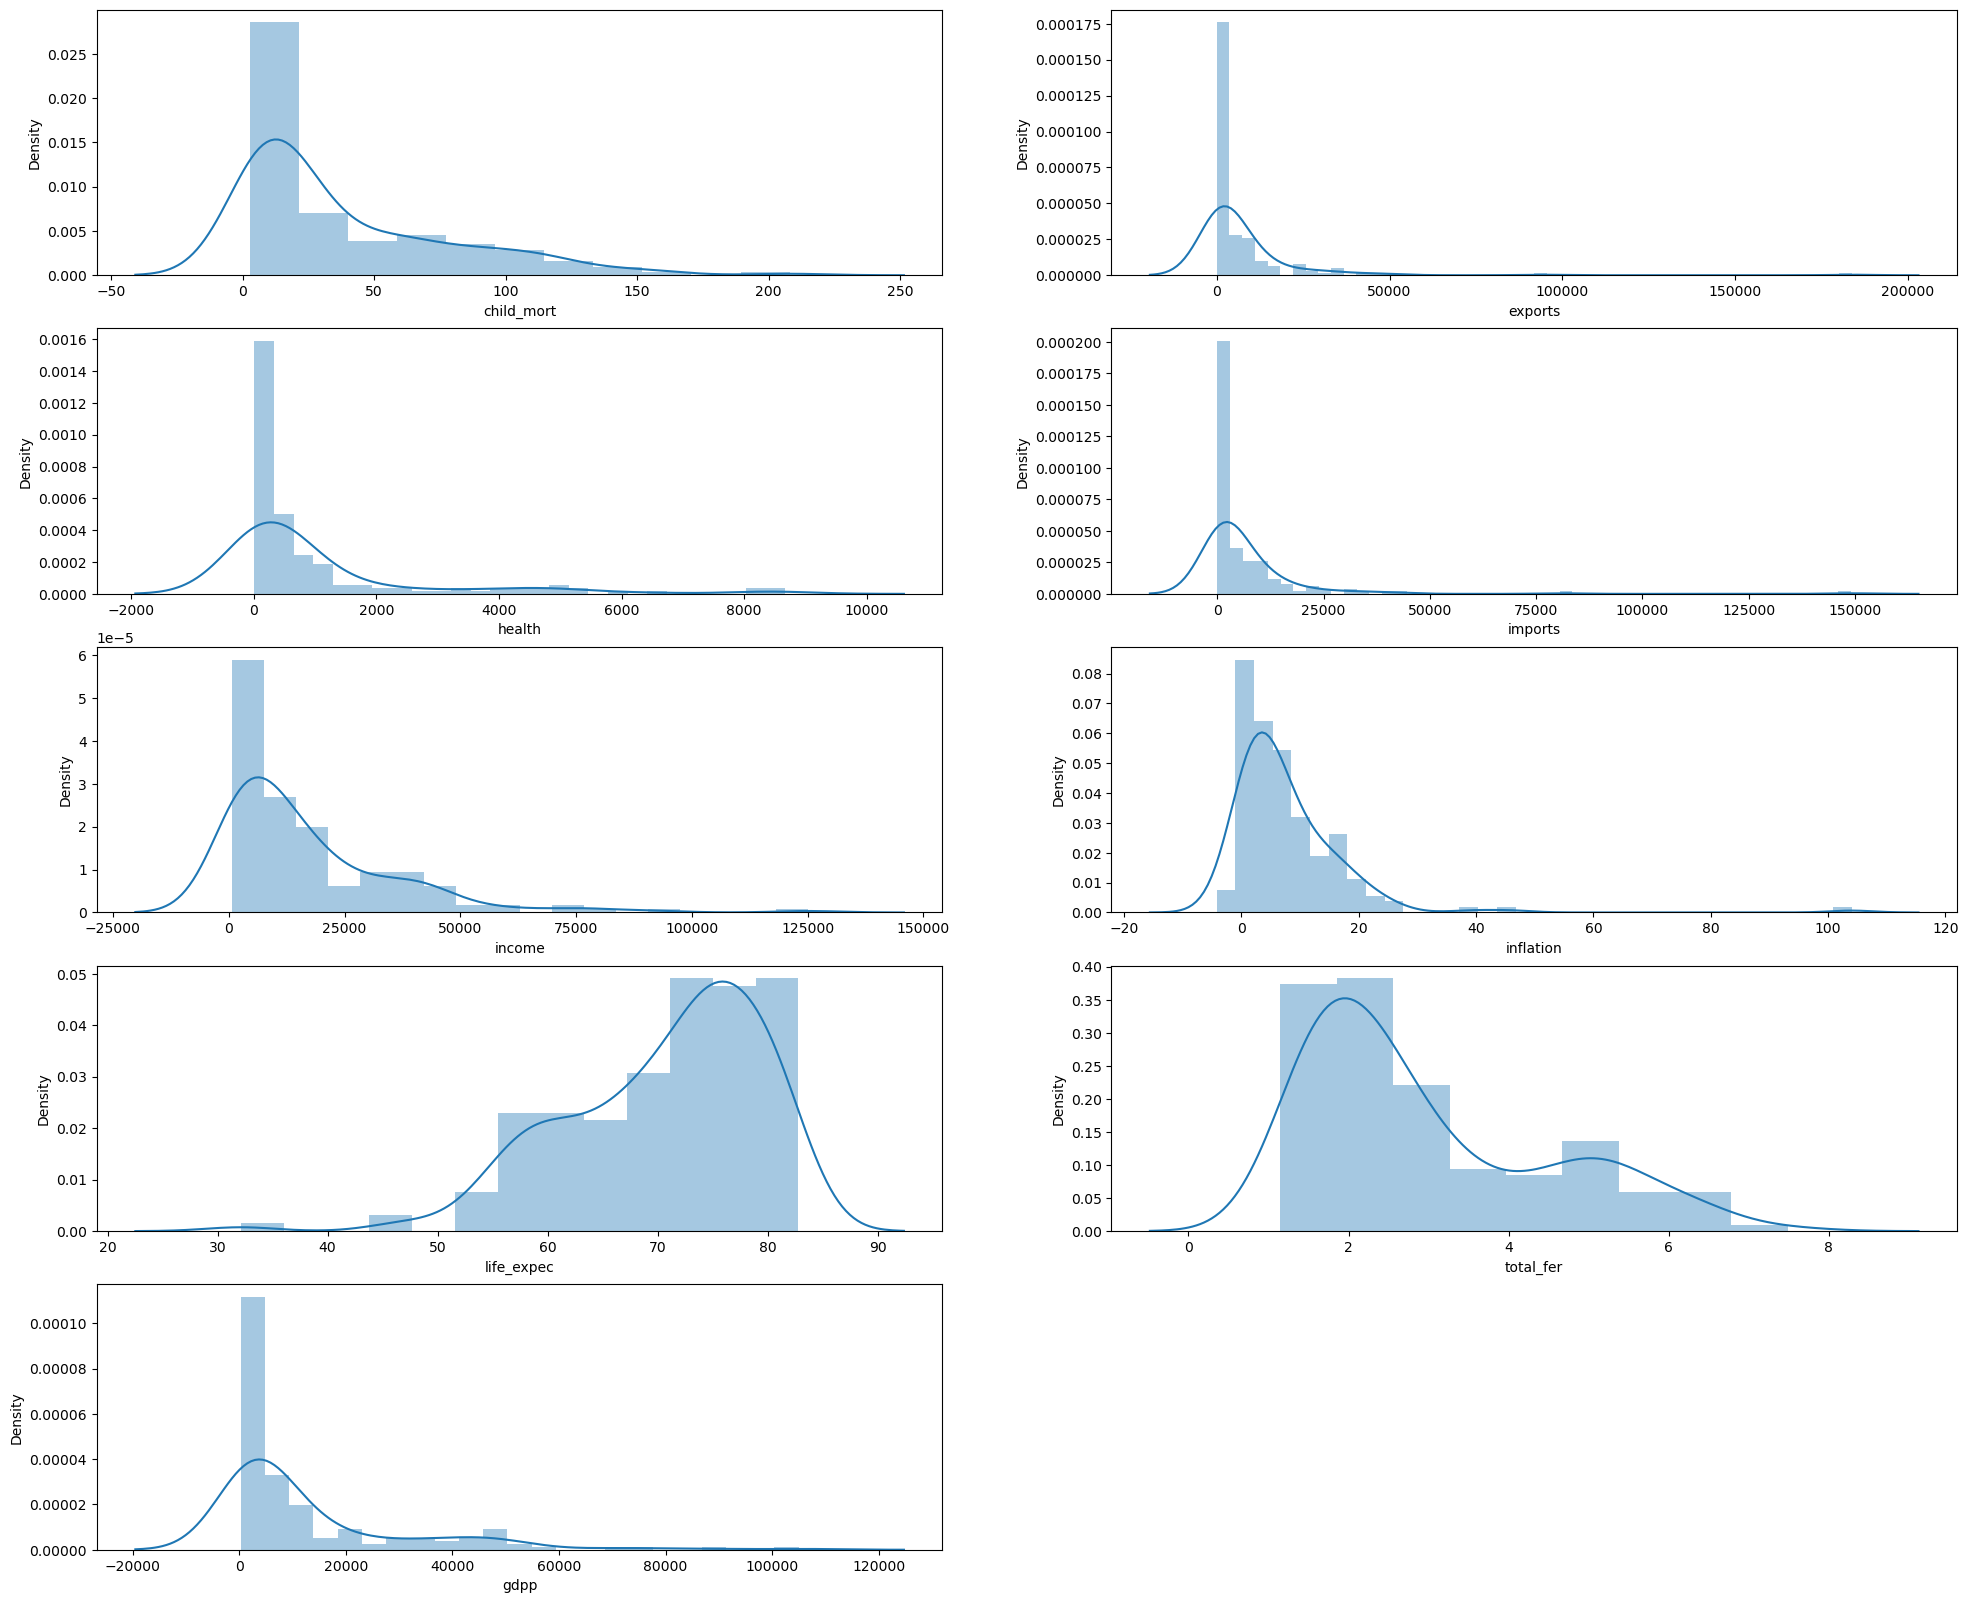

In [17]:
plt.figure(figsize=(24,20))
for i in enumerate(features):
    plt.subplot(5,2,i[0]+1)
    sns.distplot(df[i[1]])

Bivariate Analysis

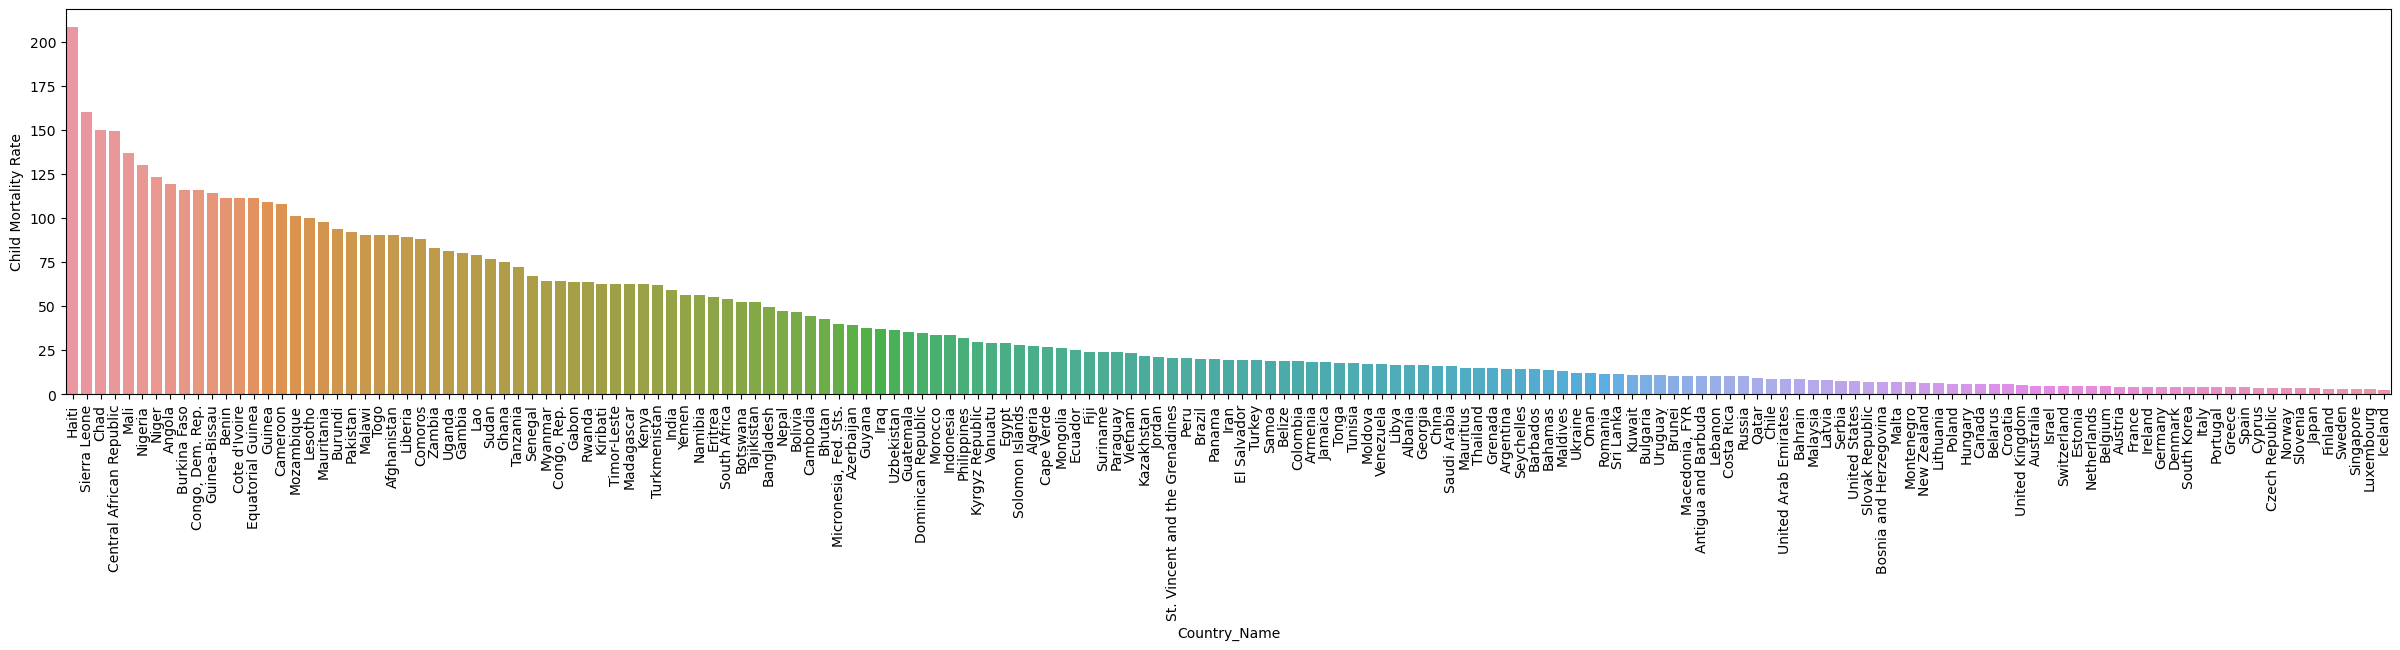

In [18]:
plt.figure(figsize = (30,5))
child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False)
ax = sns.barplot(x='country', y='child_mort', data= child_mort)
ax.set(xlabel = 'Country_Name', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

We are able to see how Child Mortality Rate is distributed across the all countries. However for our objective, we will try to filter top 10 countries having "high child mortality rate". The following bar plot represents them.

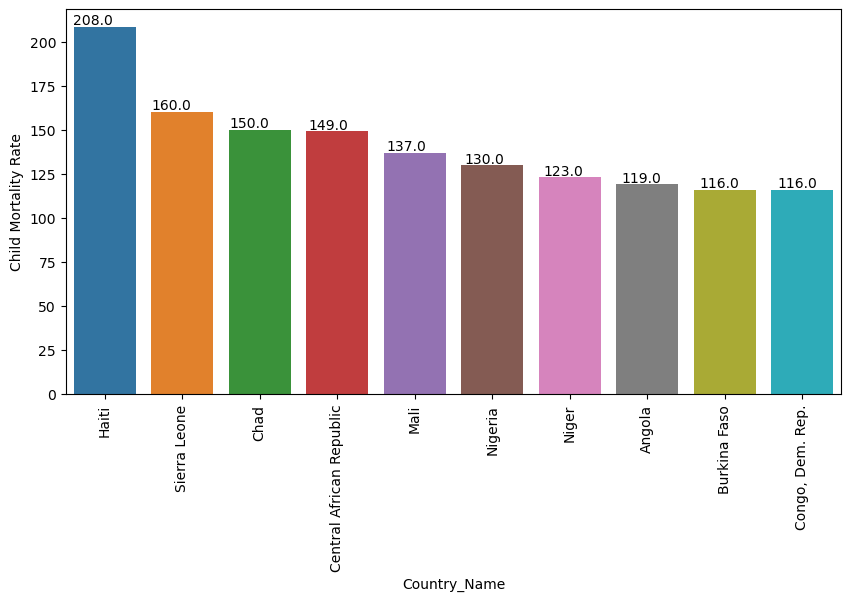

In [19]:
plt.figure(figsize = (10,5))
child_mort_top10 = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
ax = sns.barplot(x='country', y='child_mort', data= child_mort_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Country_Name', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

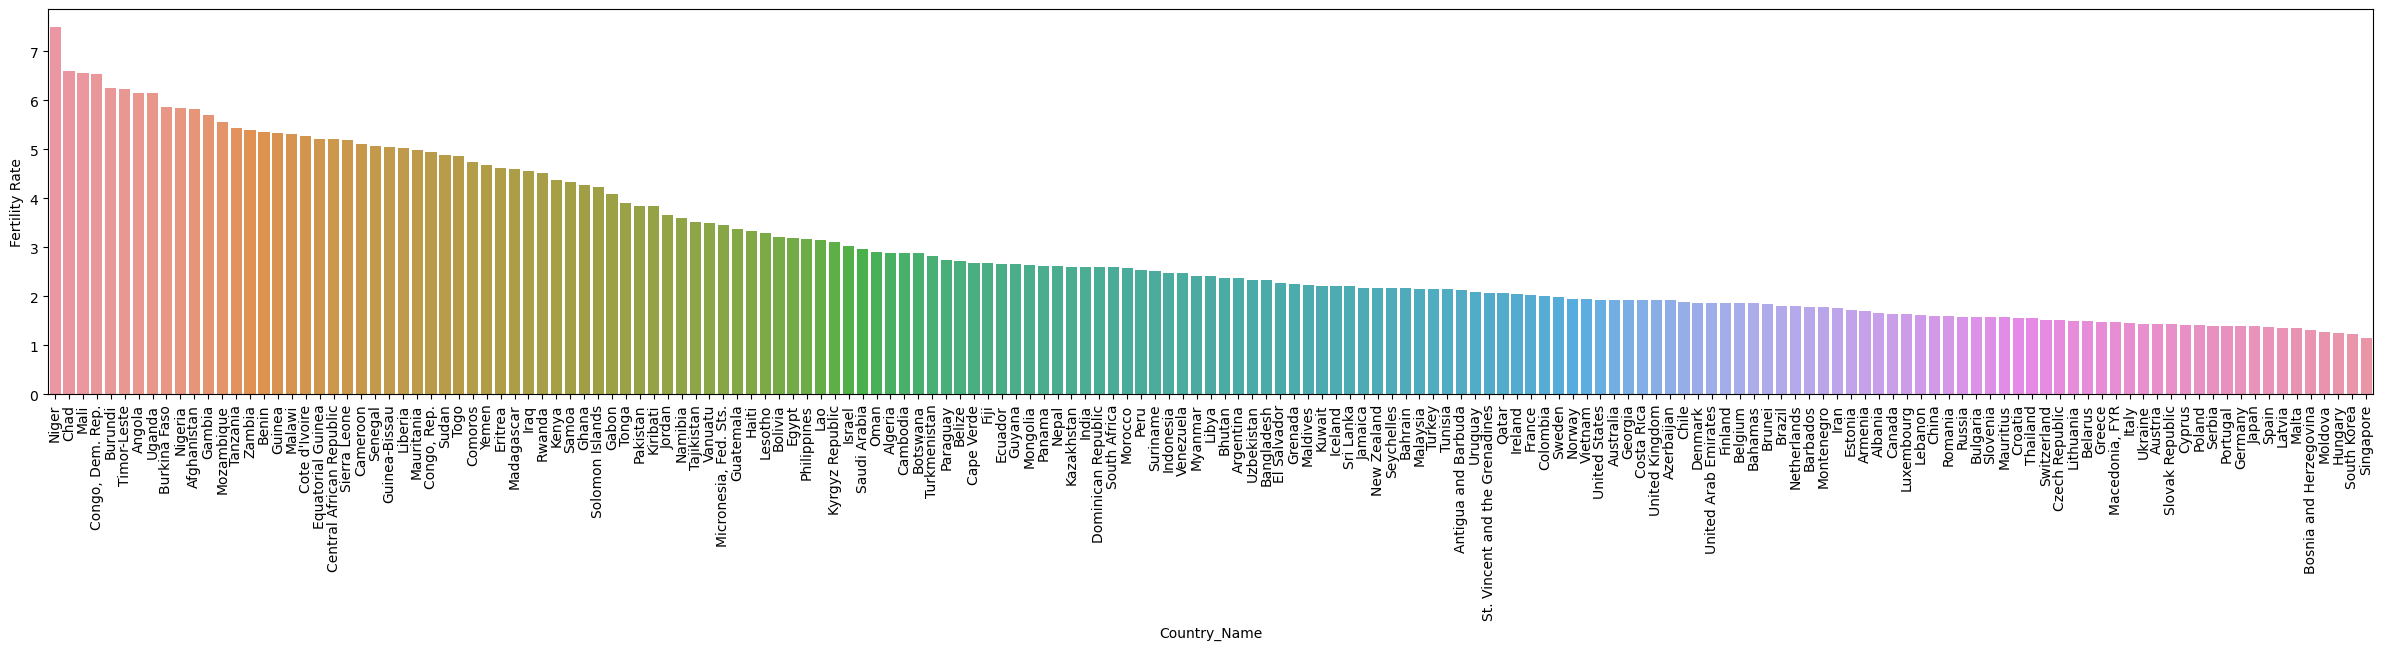

In [20]:
plt.figure(figsize = (30,5))
total_fer = df[['country','total_fer']].sort_values('total_fer', ascending = False)
ax = sns.barplot(x='country', y='total_fer', data= total_fer)
ax.set(xlabel = 'Country_Name', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.show()

We are able to see how Fertility Rate is distributed across the all countries. Let's have a look at the top 10 countries having high fertility rate.

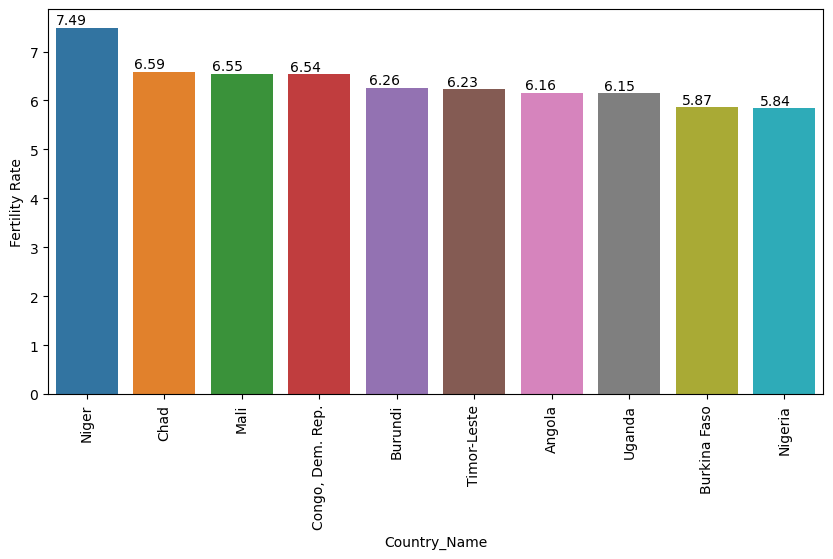

In [21]:
plt.figure(figsize = (10,5))
total_fer_top10 = df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
ax = sns.barplot(x='country', y='total_fer', data= total_fer_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Country_Name', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.show()

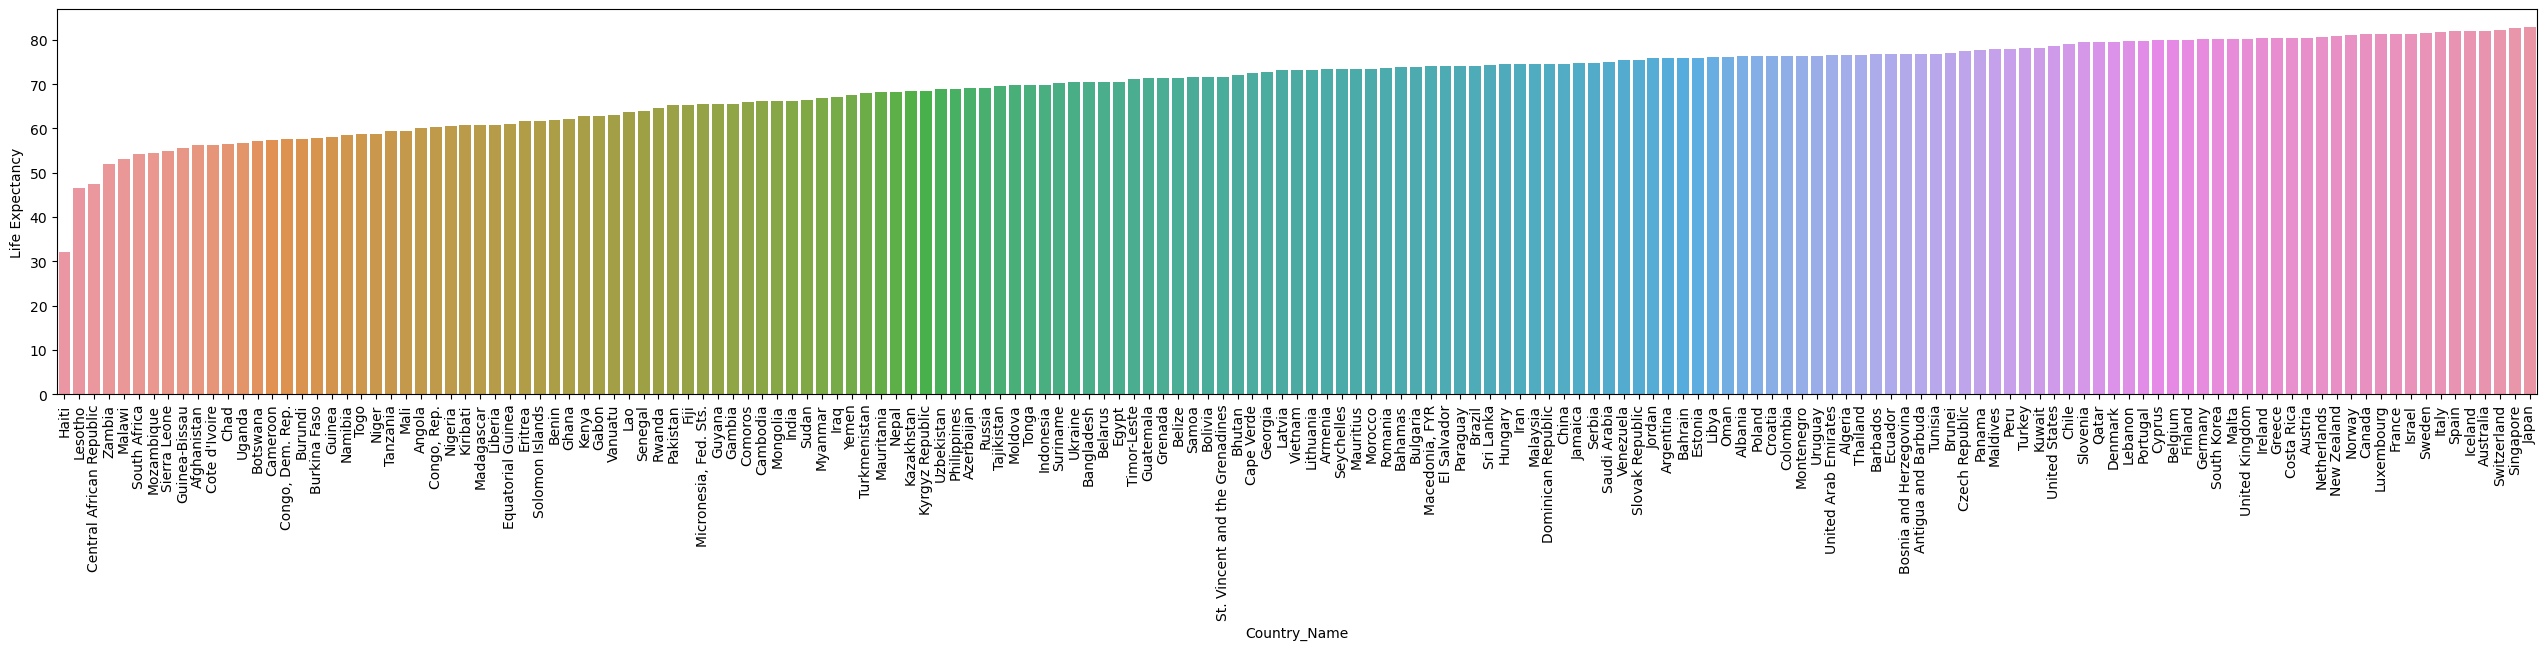

In [22]:
plt.figure(figsize = (32,5))
life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = True)
ax = sns.barplot(x='country', y='life_expec', data= life_expec)
ax.set(xlabel = 'Country_Name', ylabel= 'Life Expectancy')
plt.xticks(rotation=90)
plt.show()

We are able to see how Life Expectancy is distributed across the all countries, however we are targetting the countries having lowest Life Expectancy are places where healthcare system is not available or efficient, let's have a look at top 10 of them.

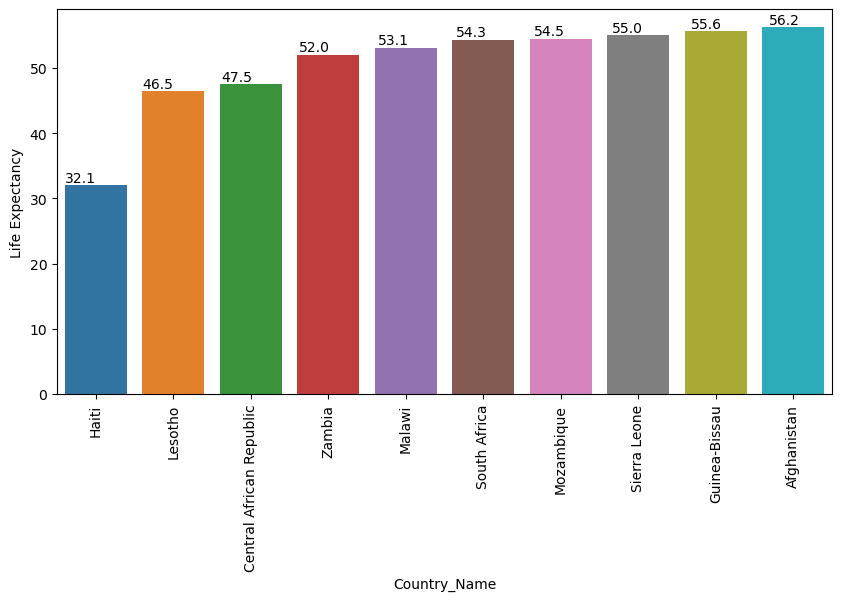

In [23]:
plt.figure(figsize = (10,5))
life_expec_bottom10 = df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
ax = sns.barplot(x='country', y='life_expec', data= life_expec_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Country_Name', ylabel= 'Life Expectancy')
plt.xticks(rotation=90)
plt.show()

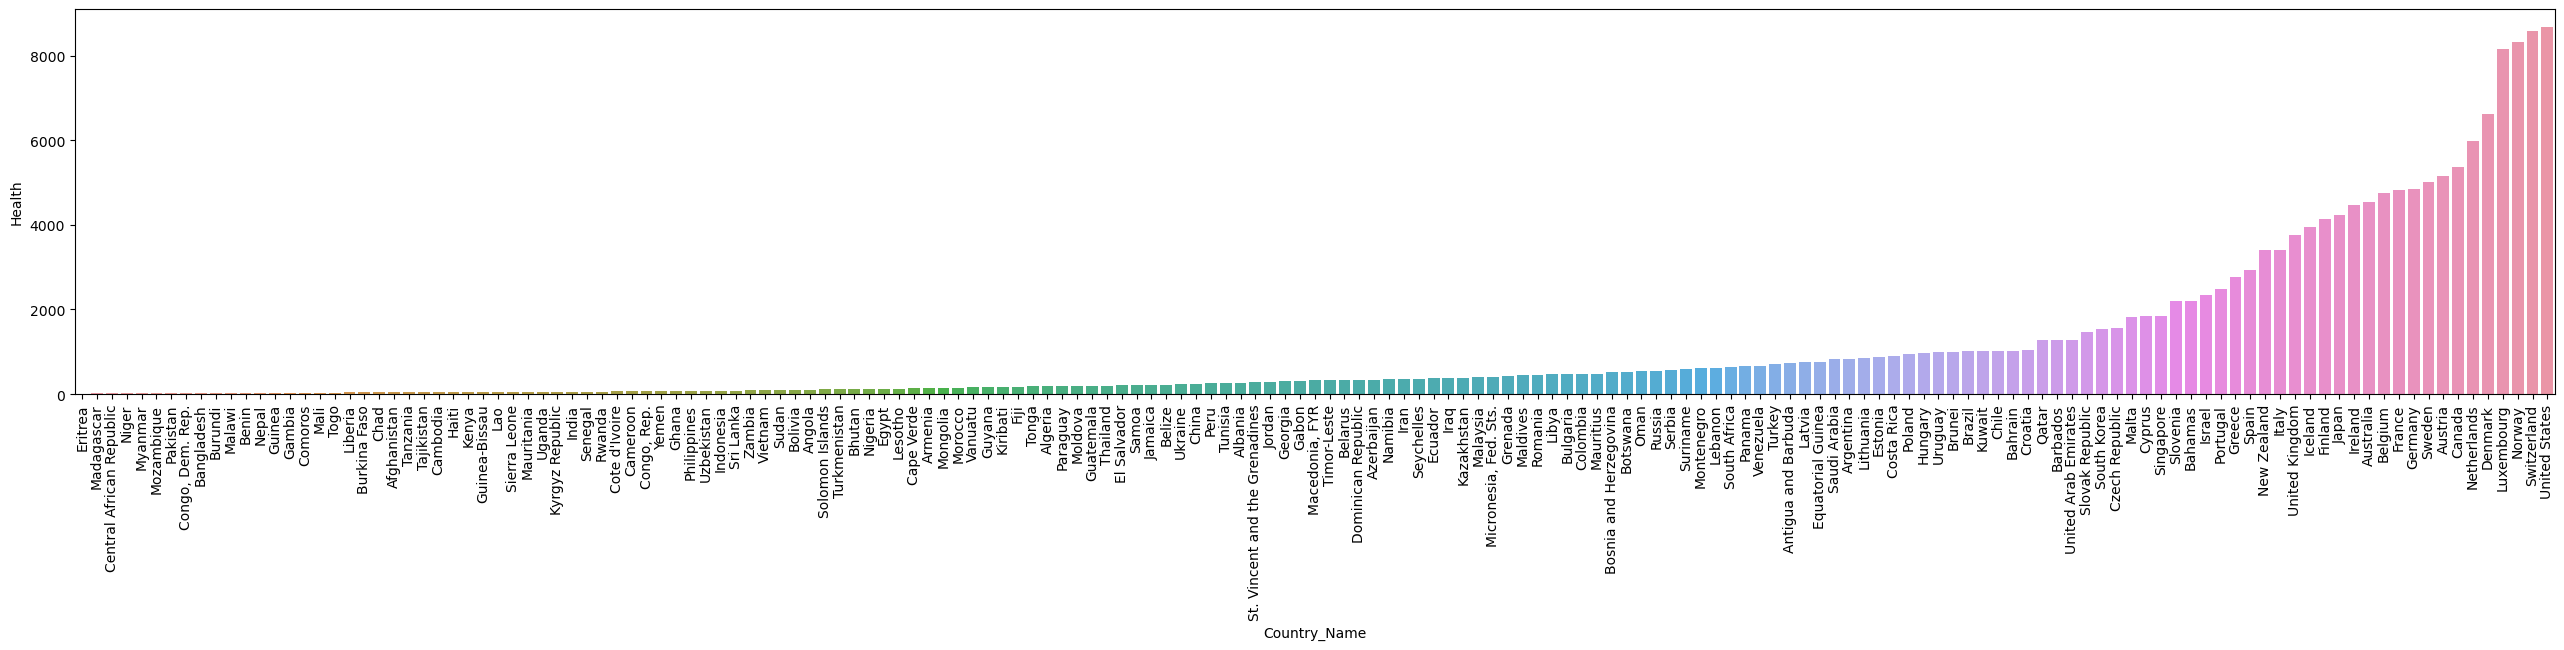

In [24]:
plt.figure(figsize = (32,5))
health = df[['country','health']].sort_values('health', ascending = True)
ax = sns.barplot(x='country', y='health', data= health)
ax.set(xlabel = 'Country_Name', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

We are able to see how Total health spending is distributed across the all countries, we are focussing on those countries who spend less on health.

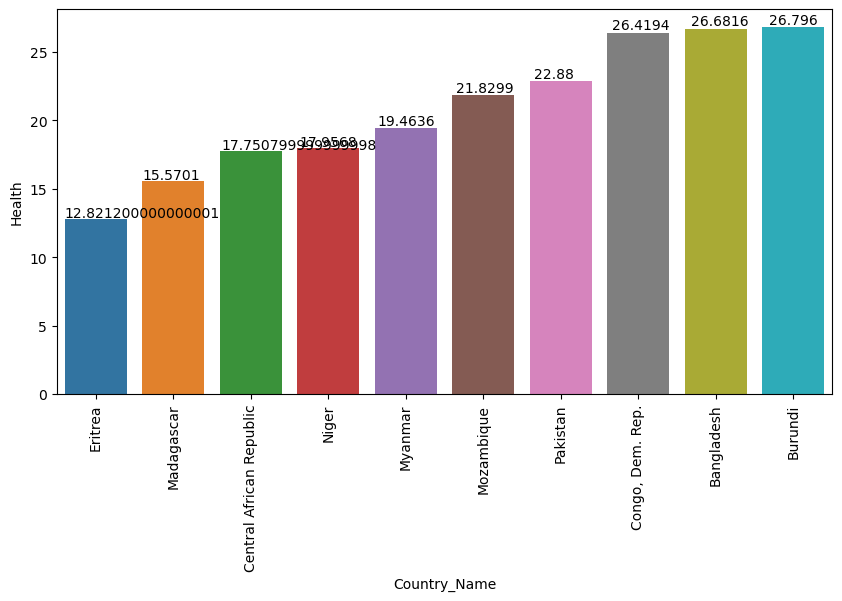

In [25]:
plt.figure(figsize = (10,5))
health_bottom10 = df[['country','health']].sort_values('health', ascending = True).head(10)
ax = sns.barplot(x='country', y='health', data= health_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Country_Name', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

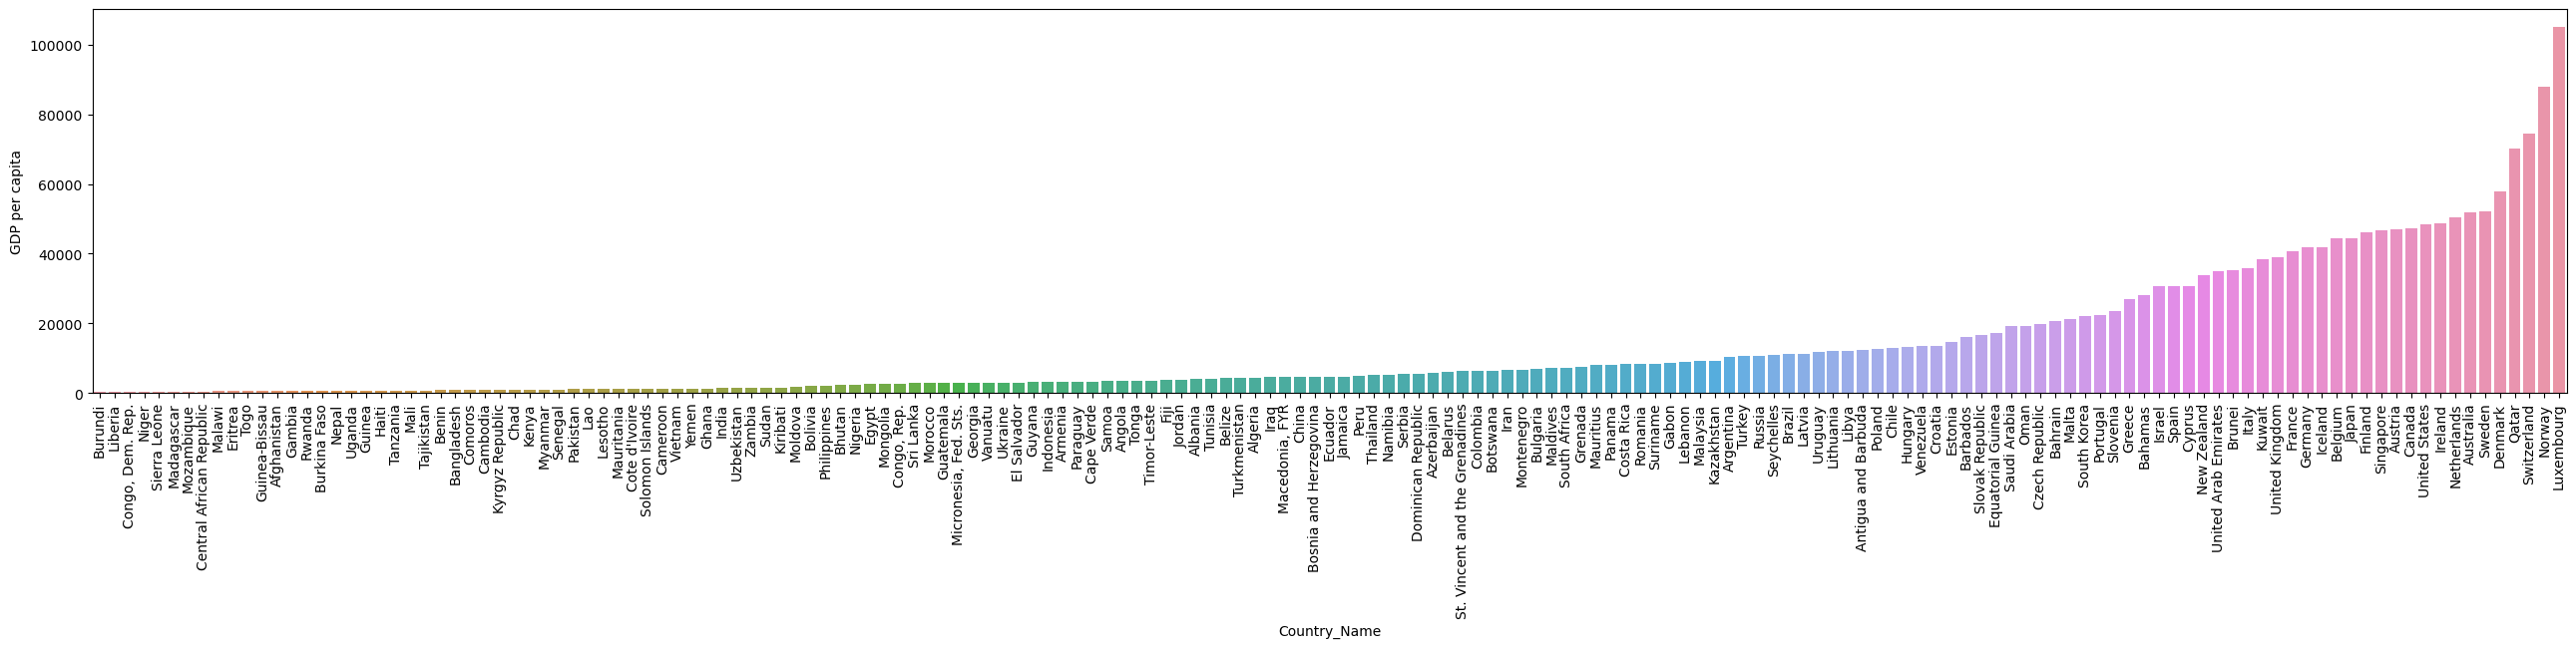

In [26]:
plt.figure(figsize = (32,5))
gdpp = df[['country','gdpp']].sort_values('gdpp', ascending = True)
ax = sns.barplot(x='country', y='gdpp', data= gdpp)
ax.set(xlabel = 'Country_Name', ylabel= 'GDP per capita')
plt.xticks(rotation=90)
plt.show()

We are able to see how GDP per capita is distributed across the all countries.We need to look for countries having less GDP, so let's extract 10 countries having lesser GDP.

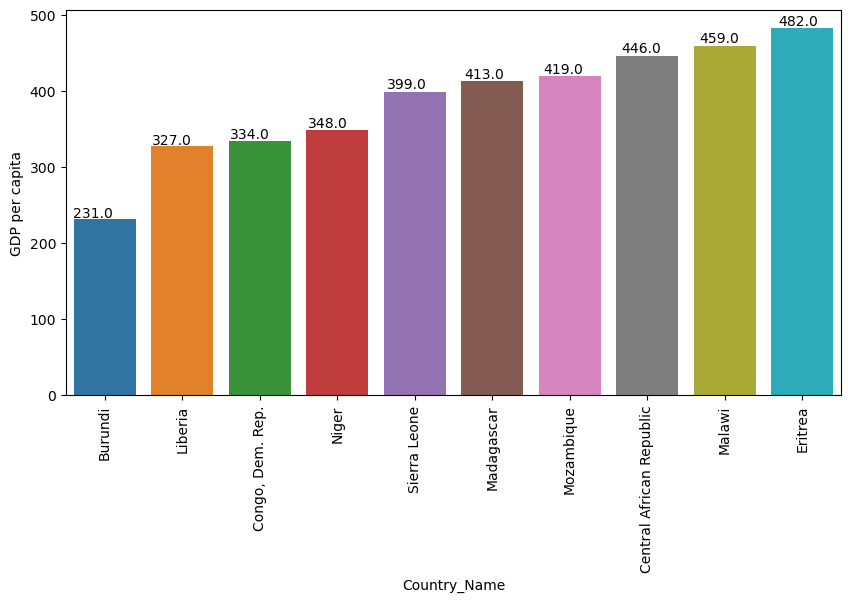

In [27]:
plt.figure(figsize = (10,5))
gdpp_bottom10 = df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
ax = sns.barplot(x='country', y='gdpp', data= gdpp_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Country_Name', ylabel= 'GDP per capita')
plt.xticks(rotation=90)
plt.show()

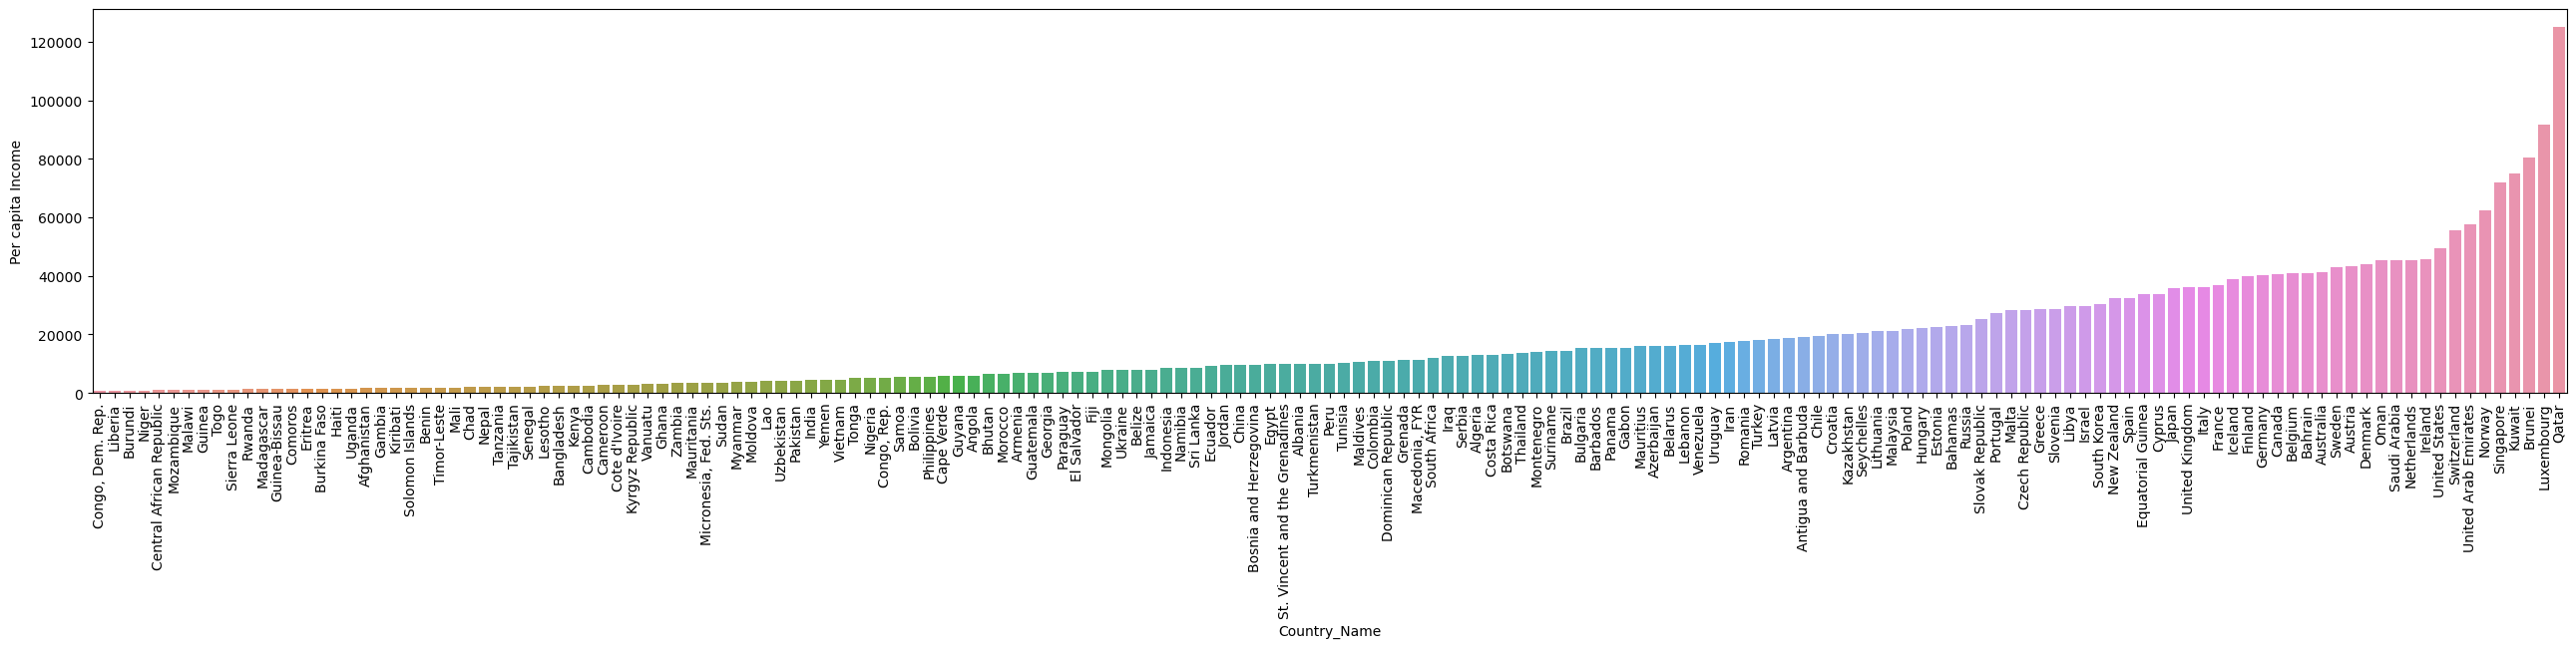

In [28]:
plt.figure(figsize = (32,5))
income = df[['country','income']].sort_values('income', ascending = True)
ax = sns.barplot(x='country', y='income', data=income)
ax.set(xlabel = 'Country_Name', ylabel= 'Per capita Income')
plt.xticks(rotation=90)
plt.show()

We are able to see how Per capita Income is distributed across the all countries. We need to look for countries having less per capita income. Let's look at 10 such countries.

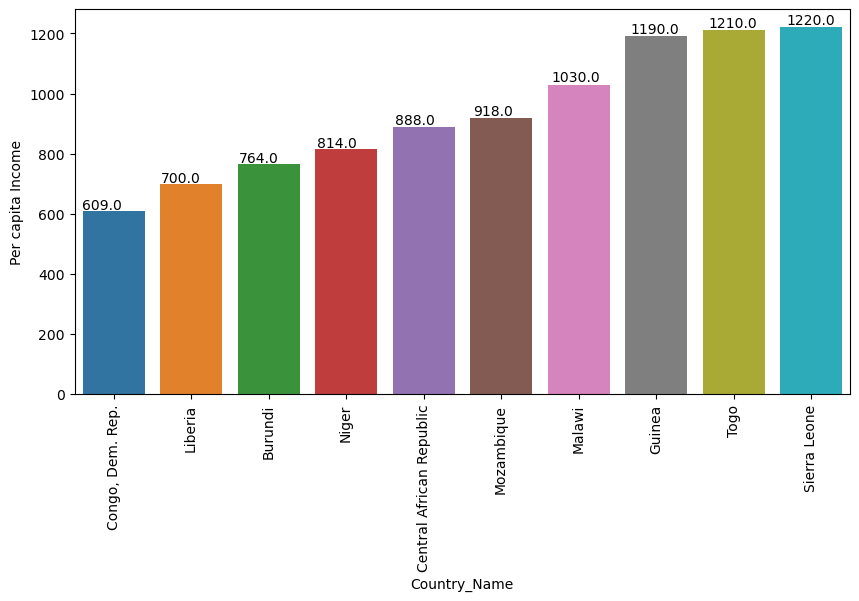

In [29]:
plt.figure(figsize = (10,5))
income_bottom10 = df[['country','income']].sort_values('income', ascending = True).head(10)
ax = sns.barplot(x='country', y='income', data= income_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Country_Name', ylabel= 'Per capita Income')
plt.xticks(rotation=90)
plt.show()

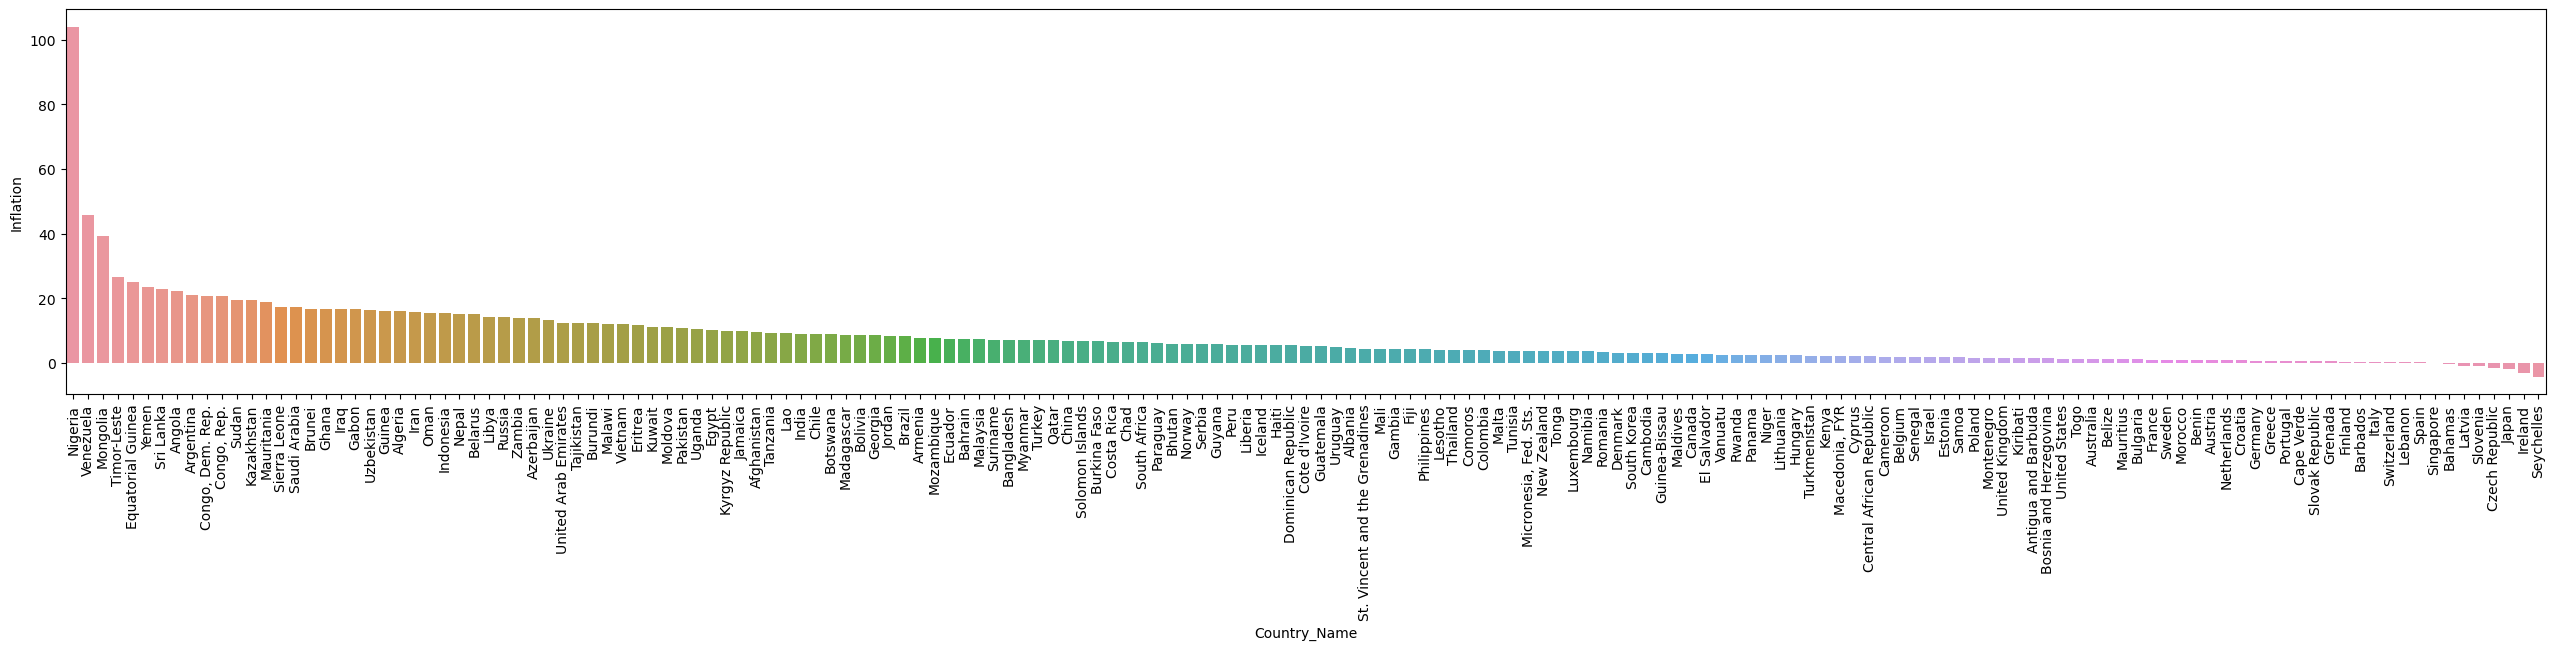

In [30]:
plt.figure(figsize = (32,5))
inflation = df[['country','inflation']].sort_values('inflation', ascending = False)
ax = sns.barplot(x='country', y='inflation', data= inflation)
ax.set(xlabel = 'Country_Name', ylabel= 'Inflation')
plt.xticks(rotation=90)
plt.show()

let's look at top 10 countries having more inflation

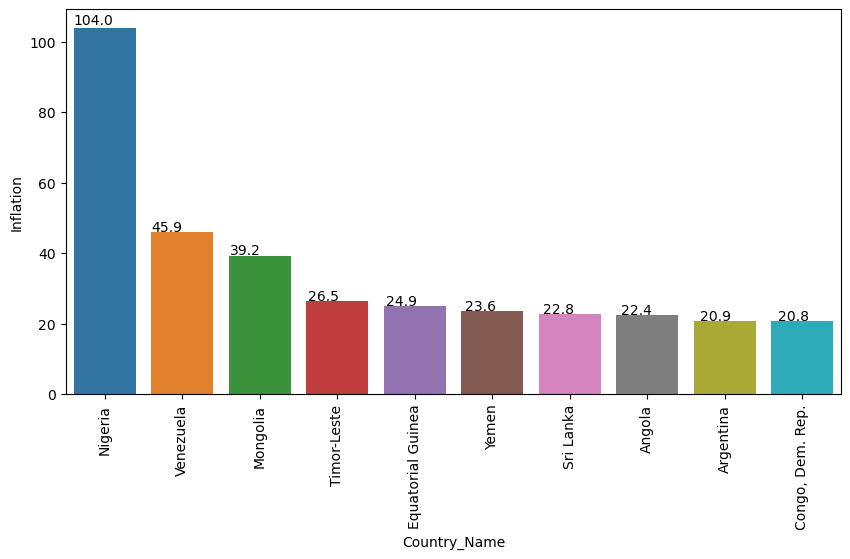

In [31]:
plt.figure(figsize = (10,5))
inflation_top10 = df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
ax = sns.barplot(x='country', y='inflation', data= inflation_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Country_Name', ylabel= 'Inflation')
plt.xticks(rotation=90)
plt.show()

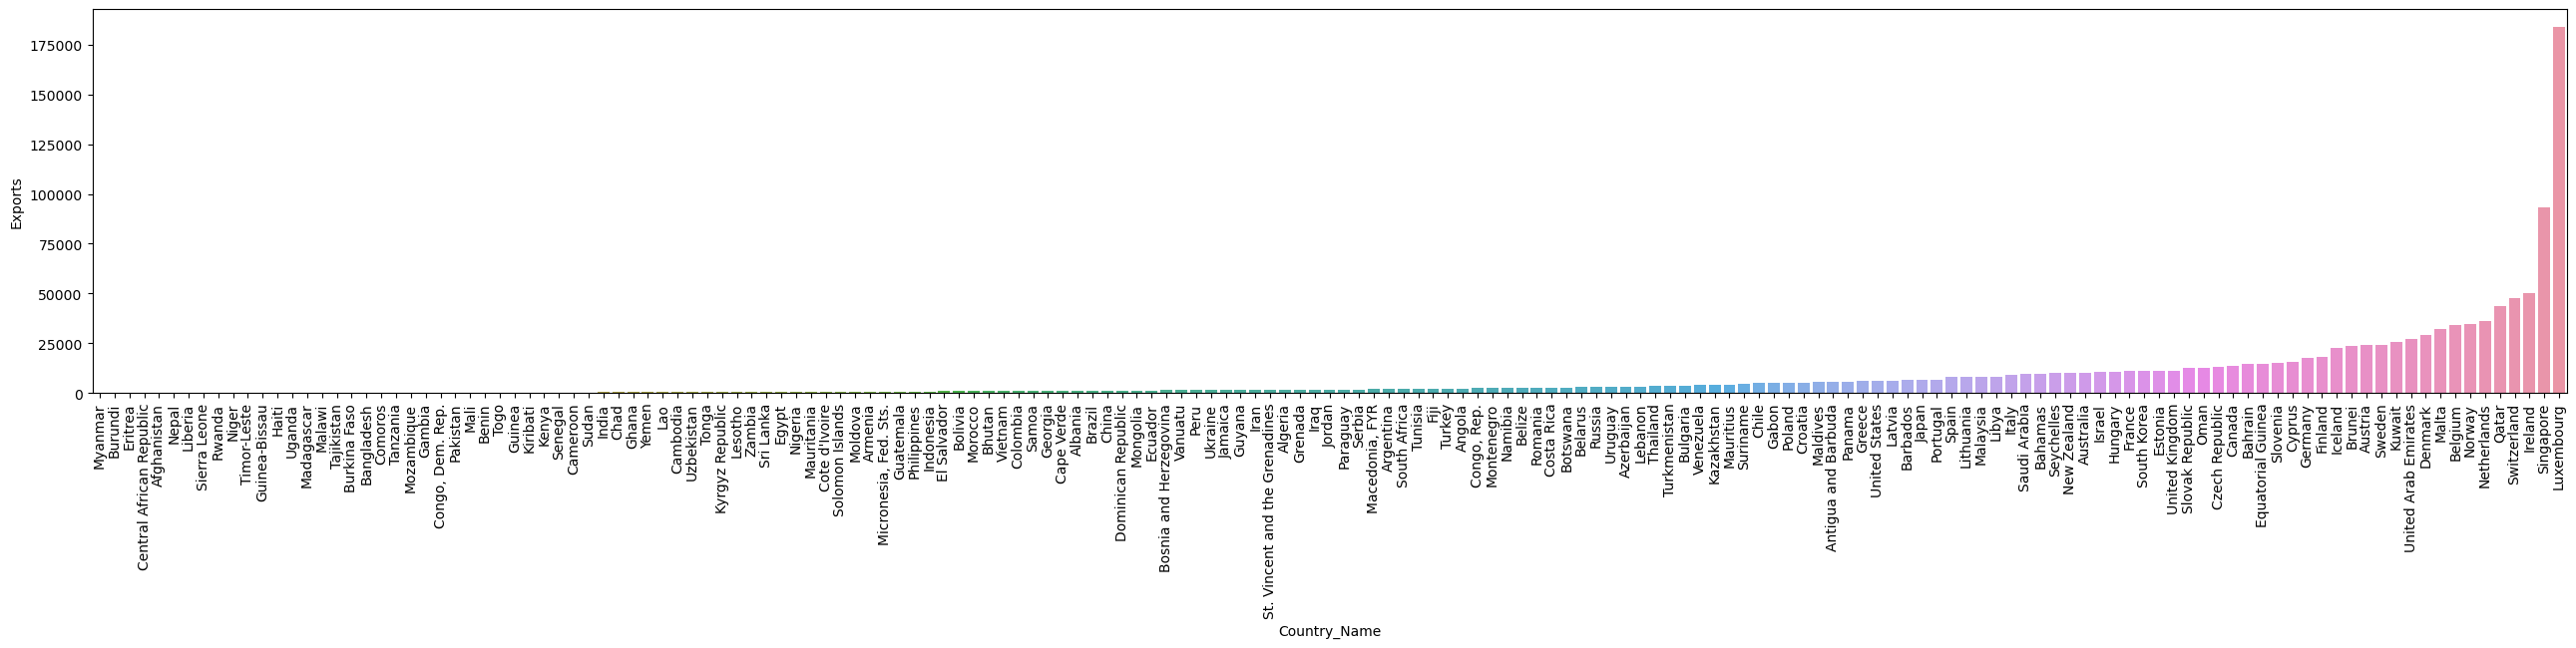

In [32]:
plt.figure(figsize = (32,5))
exports = df[['country','exports']].sort_values('exports', ascending = True)
ax = sns.barplot(x='country', y='exports', data= exports)
ax.set(xlabel = 'Country_Name', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

Top 10 copuntries having least export, they can be considered as most underdeveloped/developing countries, not being able to do much of export.

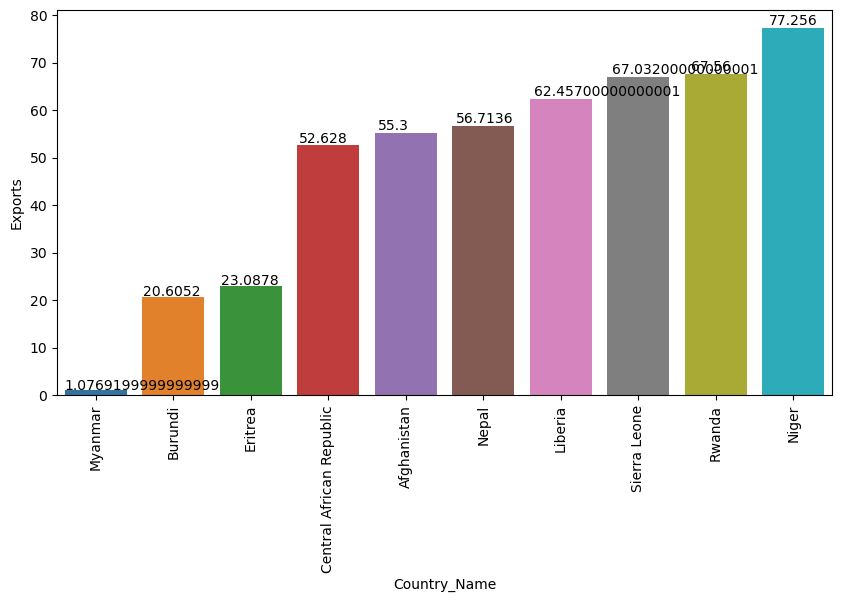

In [33]:
plt.figure(figsize = (10,5))
exports_bottom10 = df[['country','exports']].sort_values('exports', ascending = True).head(10)
ax = sns.barplot(x='country', y='exports', data= exports_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Country_Name', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

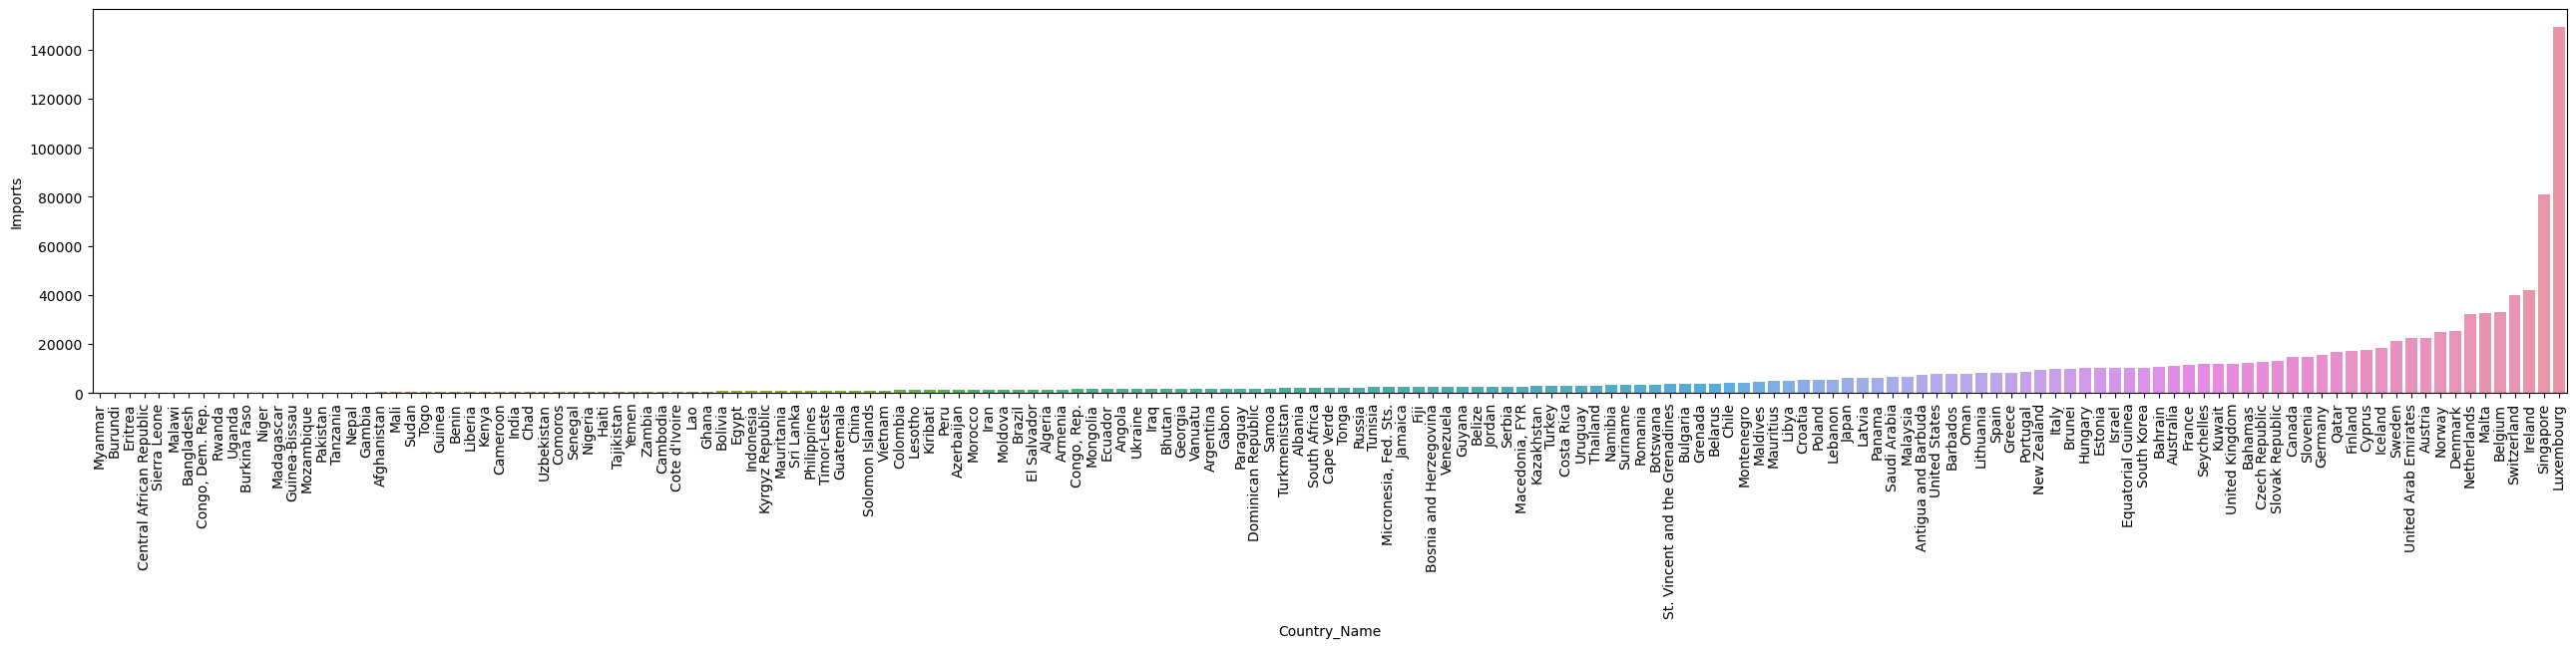

In [34]:
plt.figure(figsize = (32,5))
imports = df[['country','imports']].sort_values('imports', ascending = True)
ax = sns.barplot(x='country', y='imports', data= imports)
ax.set(xlabel = 'Country_Name', ylabel= 'Imports')
plt.xticks(rotation=90)
plt.show()

We are able to see how Imports is distributed across the all countries. We will see companies with lowest imports.

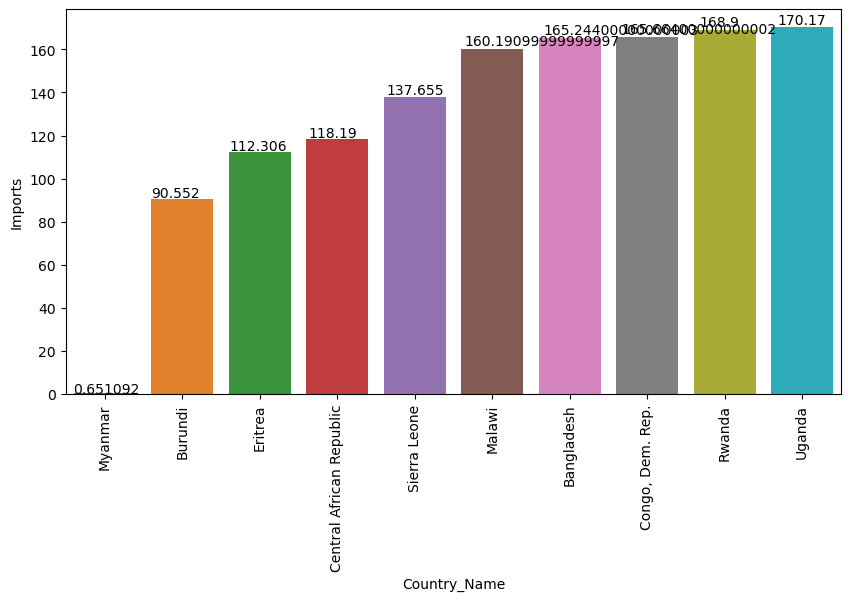

In [35]:
plt.figure(figsize = (10,5))
imports_bottom10 = df[['country','imports']].sort_values('imports', ascending = True).head(10)
ax = sns.barplot(x='country', y='imports', data= imports_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = 'Country_Name', ylabel= 'Imports')
plt.xticks(rotation=90)
plt.show()

Let's see top 5 of them in one figure

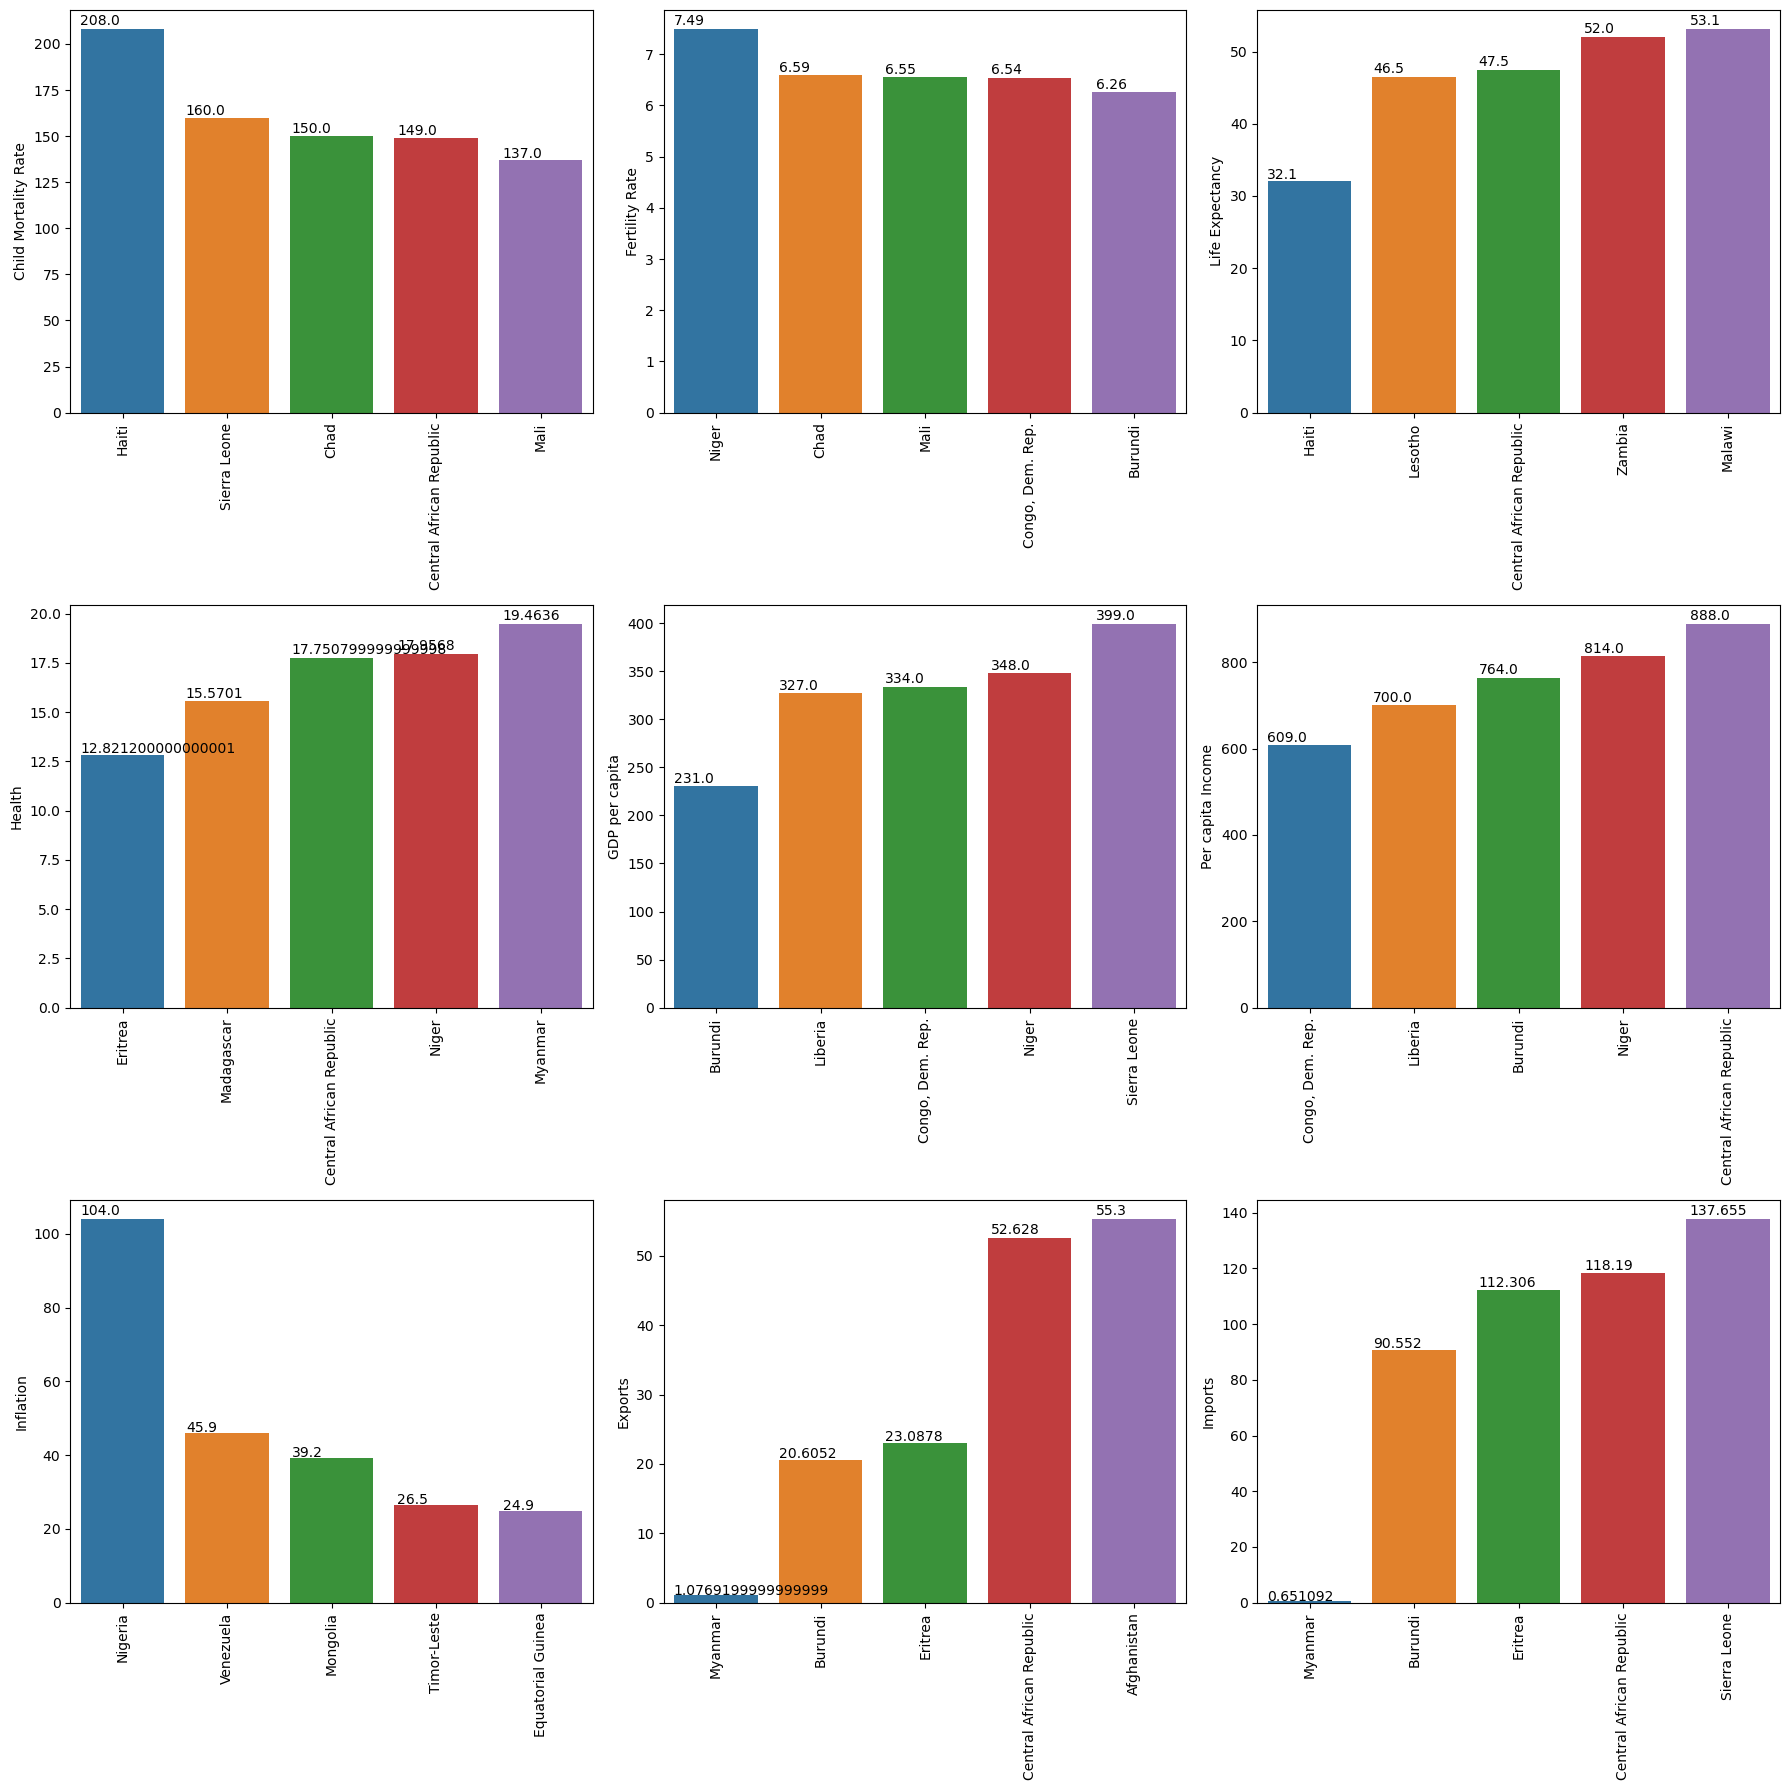

In [36]:
fig, axs = plt.subplots(3,3,figsize = (18,18))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top5_child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False).head()
ax = sns.barplot(x='country', y='child_mort', data= top5_child_mort, ax = axs[0,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top5_total_fer = df[['country','total_fer']].sort_values('total_fer', ascending = False).head()
ax = sns.barplot(x='country', y='total_fer', data= top5_total_fer, ax = axs[0,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom5_life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = True).head()
ax = sns.barplot(x='country', y='life_expec', data= bottom5_life_expec, ax = axs[0,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending

bottom5_health = df[['country','health']].sort_values('health', ascending = True).head()
ax = sns.barplot(x='country', y='health', data= bottom5_health, ax = axs[1,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom5_gdpp = df[['country','gdpp']].sort_values('gdpp', ascending = True).head()
ax = sns.barplot(x='country', y='gdpp', data= bottom5_gdpp, ax = axs[1,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom5_income = df[['country','income']].sort_values('income', ascending = True).head()
ax = sns.barplot(x='country', y='income', data= bottom5_income, ax = axs[1,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top5_inflation = df[['country','inflation']].sort_values('inflation', ascending = False).head()
ax = sns.barplot(x='country', y='inflation', data= top5_inflation, ax = axs[2,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services.

bottom5_exports = df[['country','exports']].sort_values('exports', ascending = True).head()
ax = sns.barplot(x='country', y='exports', data= bottom5_exports, ax = axs[2,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services

bottom5_imports = df[['country','imports']].sort_values('imports', ascending = True).head()
ax = sns.barplot(x='country', y='imports', data= bottom5_imports, ax = axs[2,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('EDA')
plt.show()

In [37]:
import plotly.express as px

fig.show()
fig = px.scatter_matrix(df, dimensions=["child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"], color="country")
fig.show()

Multivariate analysis

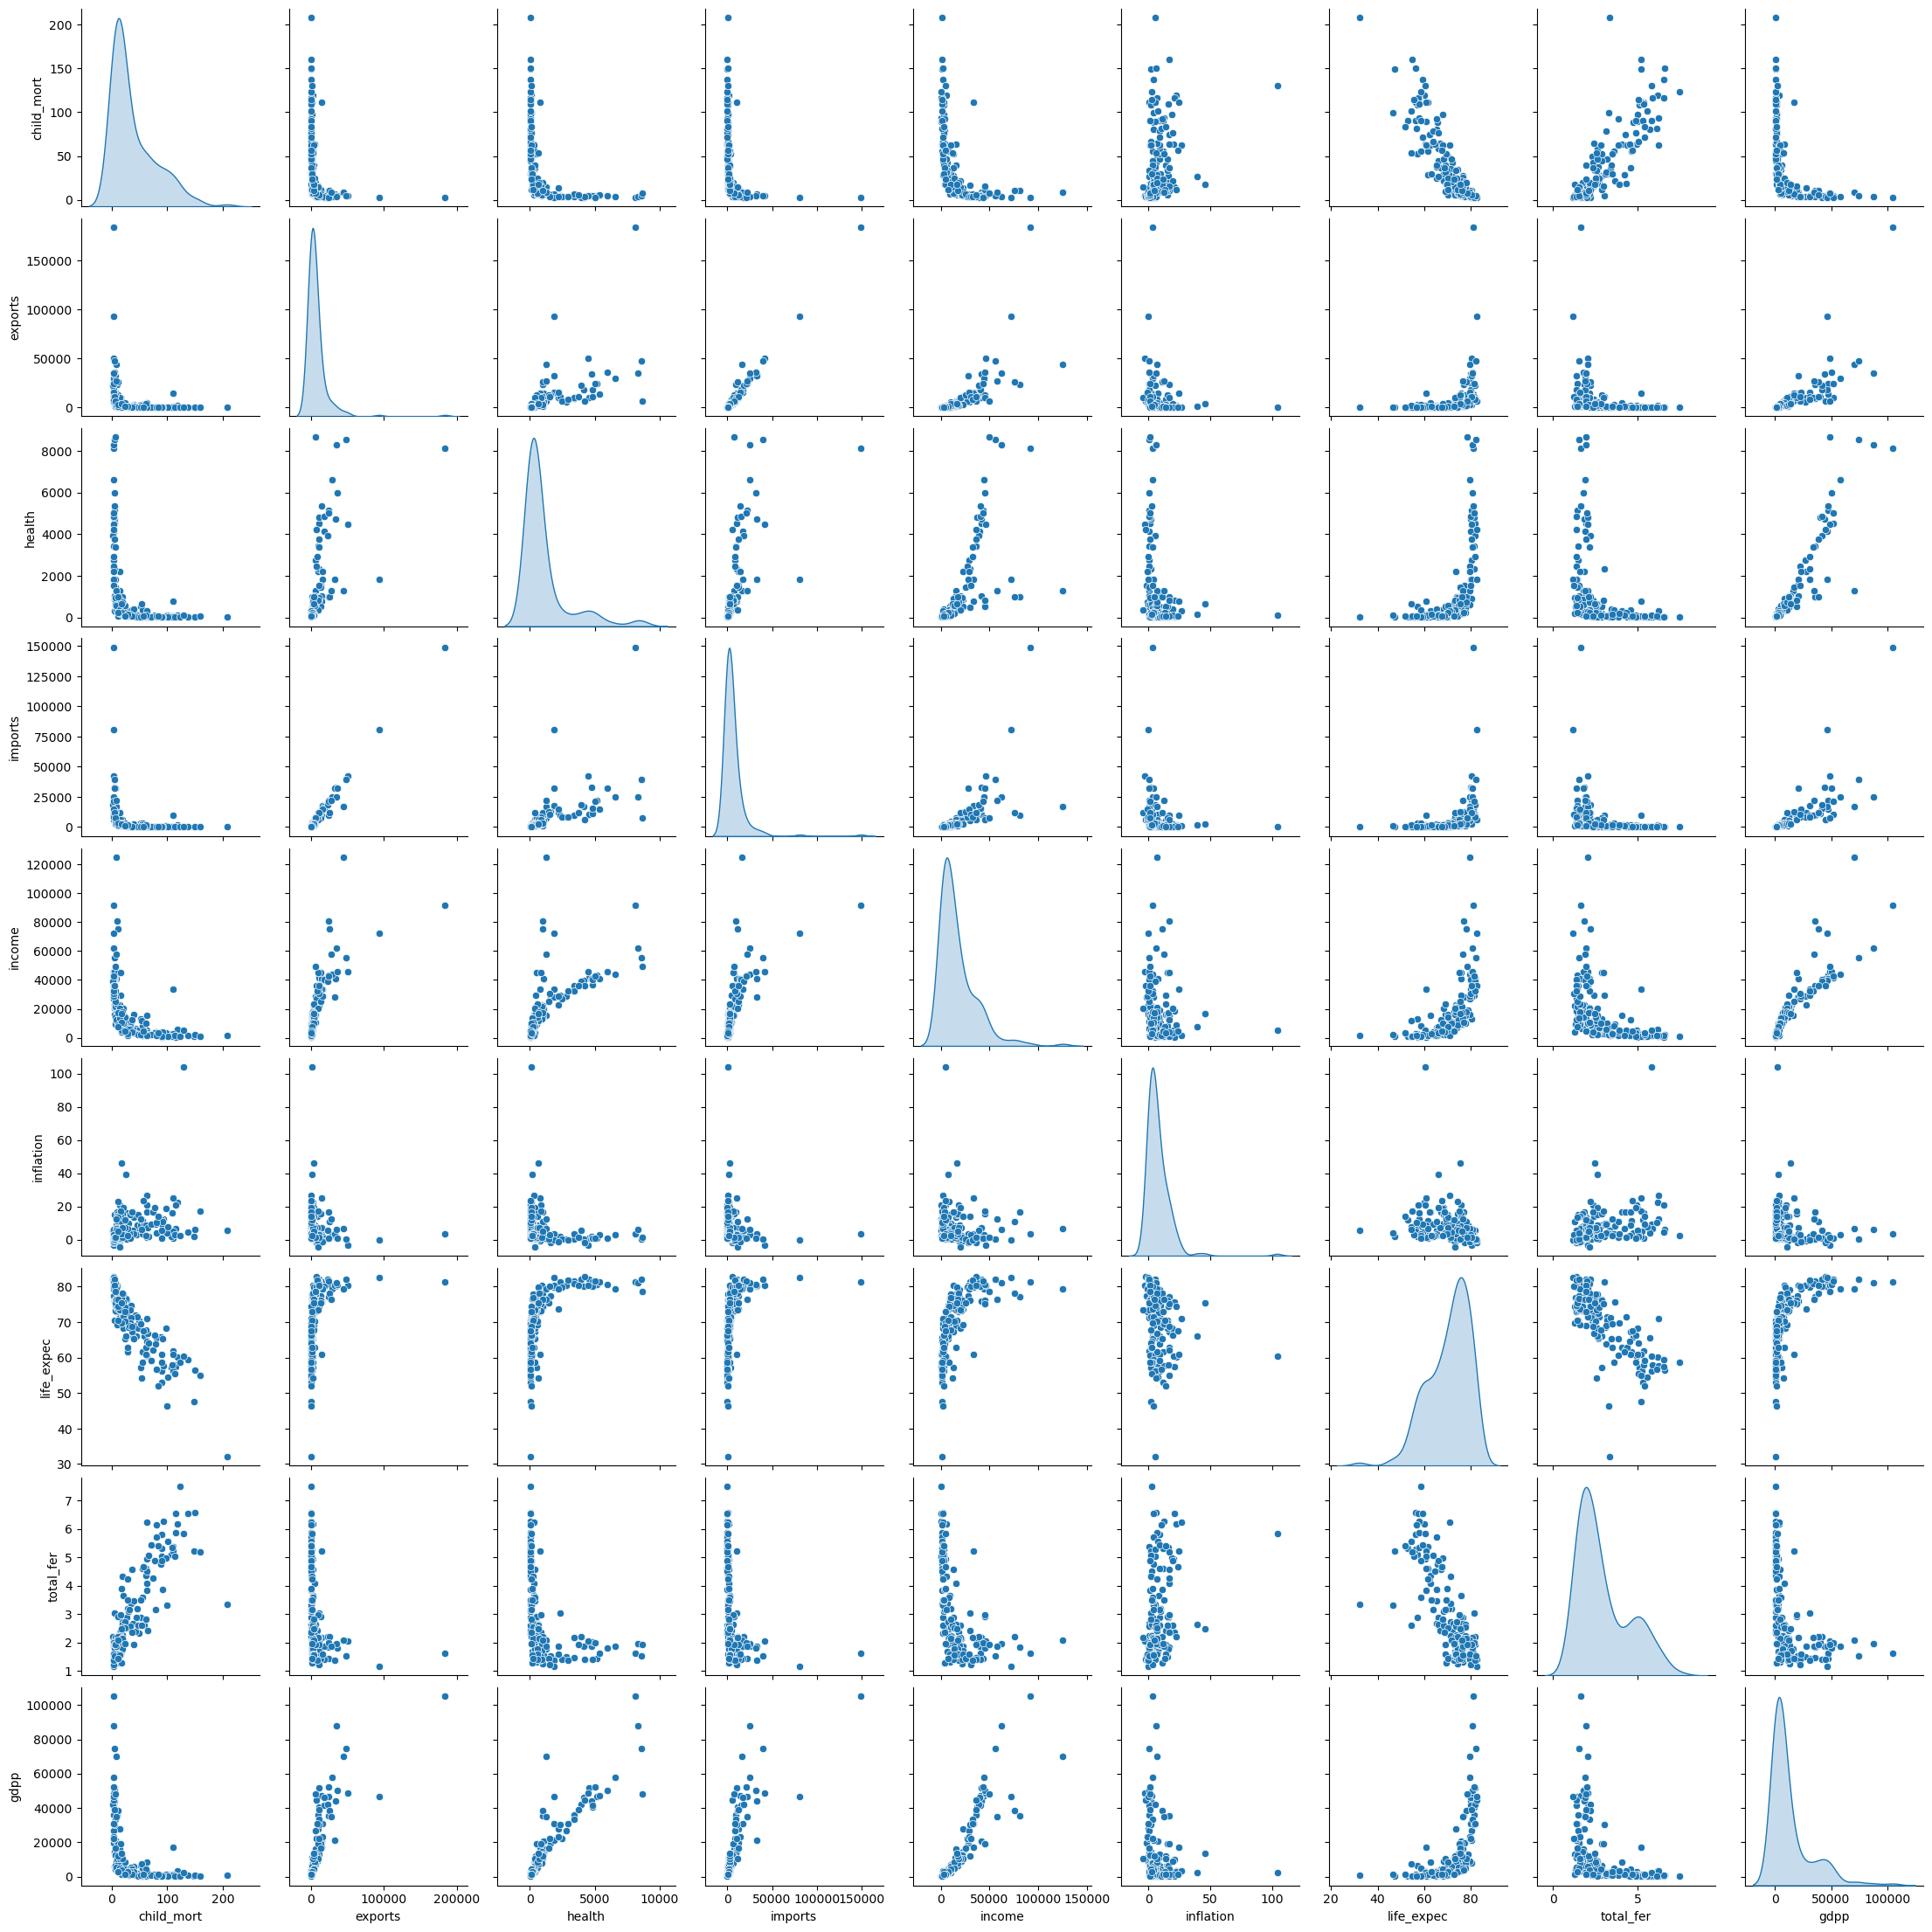

In [38]:
sns.pairplot(df,diag_kind="kde")

plt.show()

5. Hopskin Score Check

In [39]:
df.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [40]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    
    n = len(X) 
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [41]:
hopkins(df.drop('country', axis = 1))

0.956781029388815

As we can see after running 20 iterations that hopskin score is more than 80% and its definitely good for clustering as it has clustering tendency.

6. Outlier checking and Treatment

we will use boxplot to visualise the outliers to actually see the outliers and treat them, in case its required to treat (outlier capping), else if keeping these outliers as it is helps us for our problem statement , we will keep them.



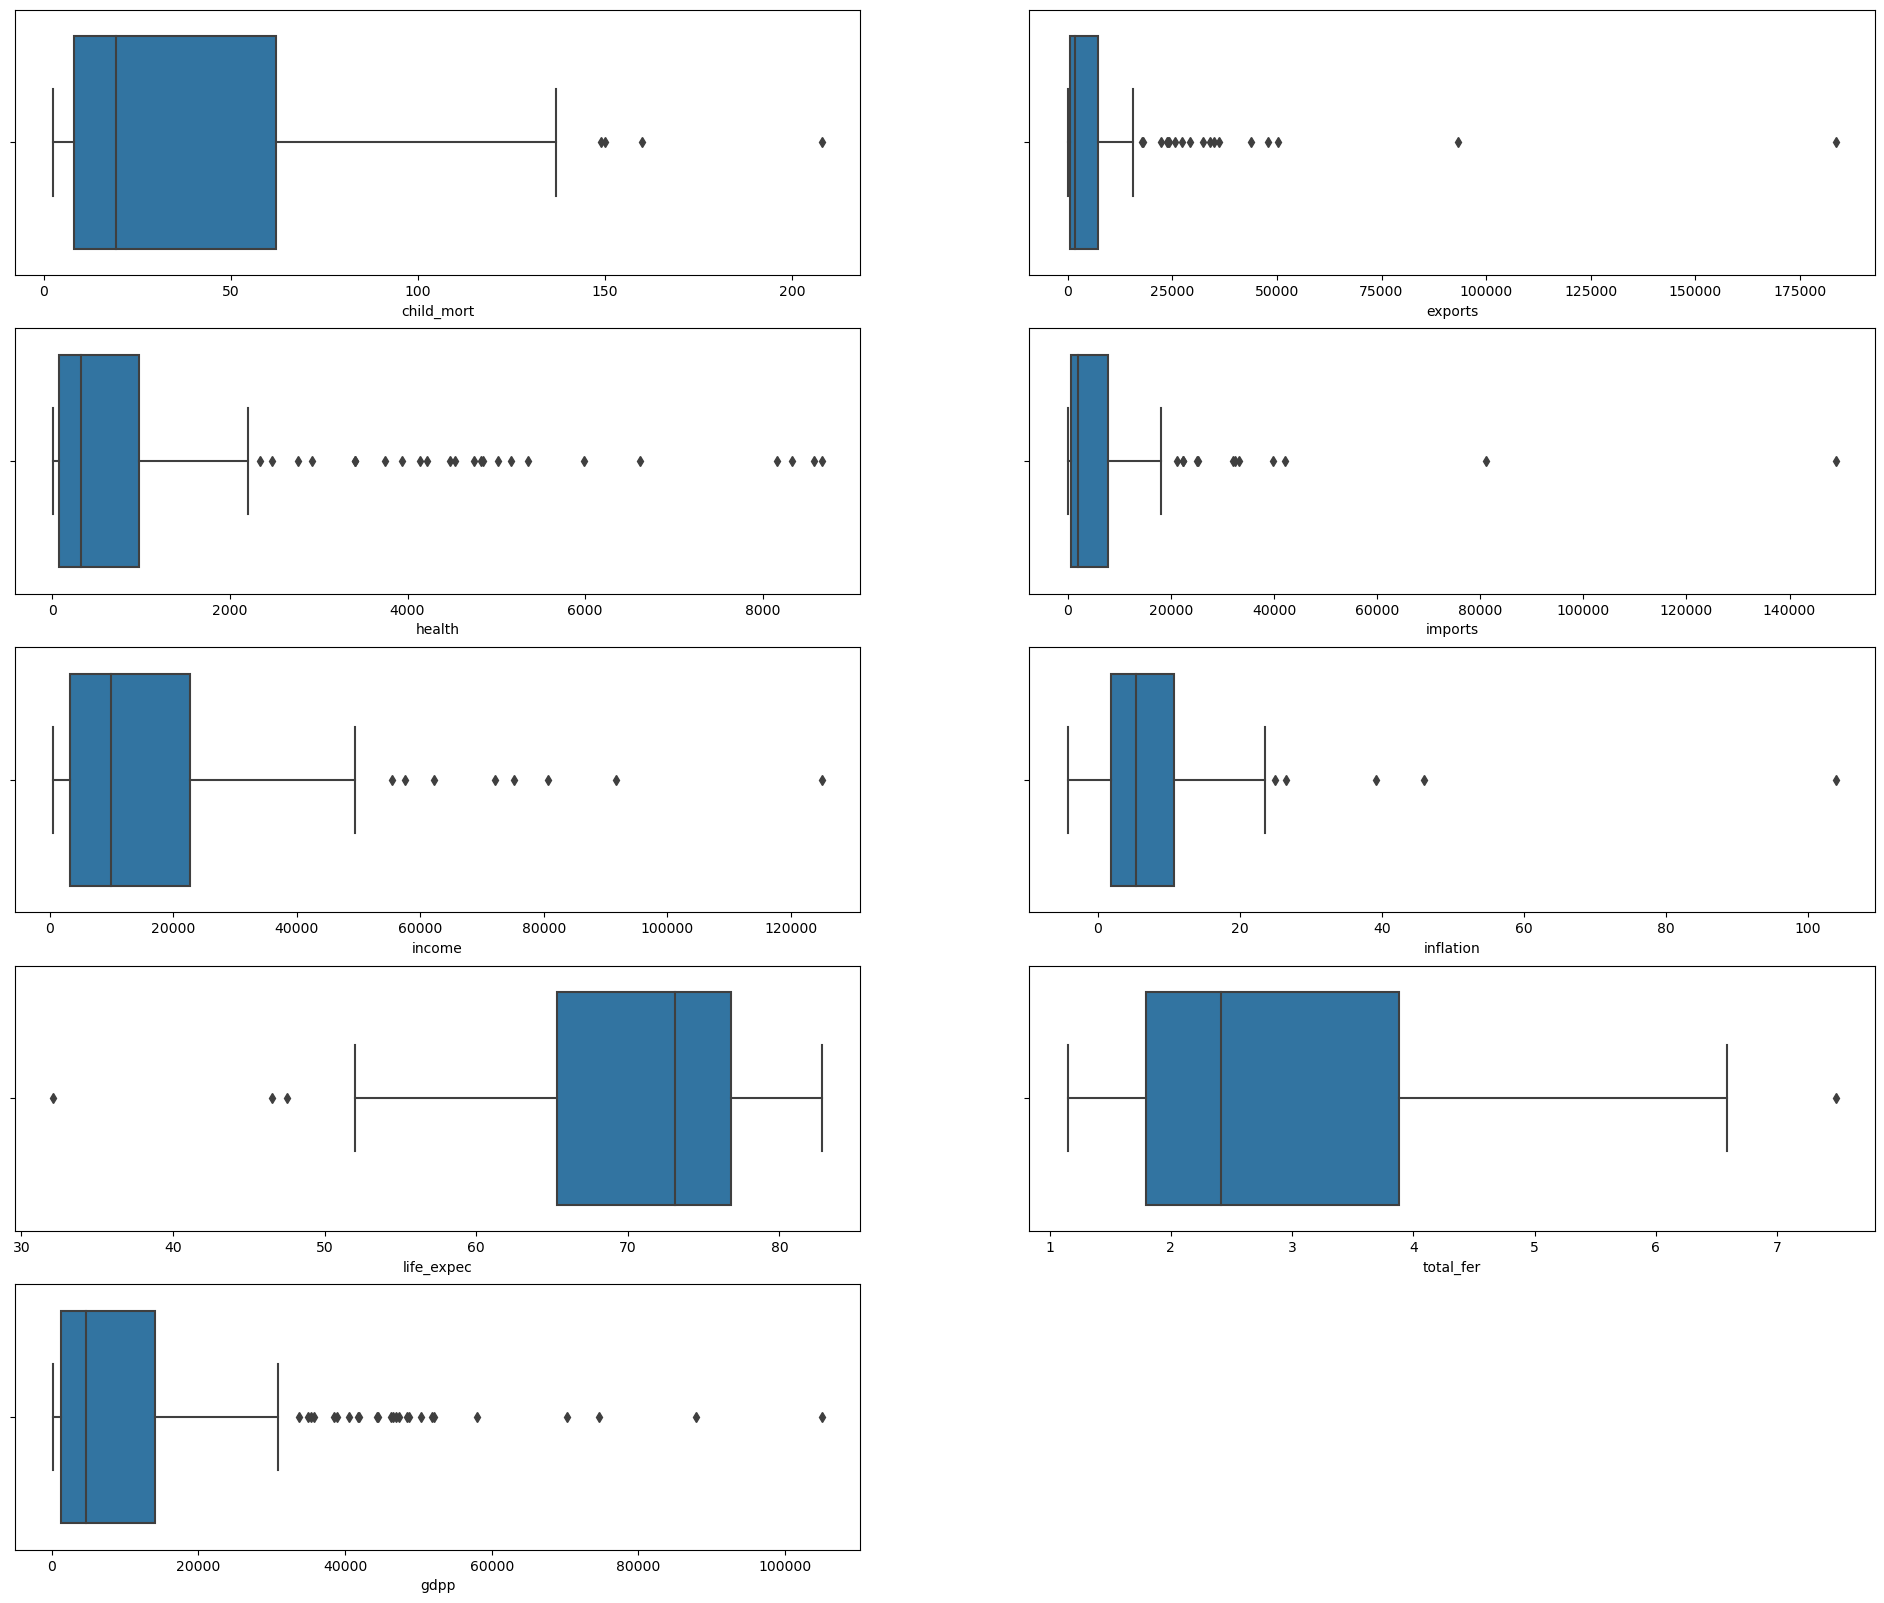

In [42]:
plt.figure(figsize=(24,20))
for i in enumerate(features):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x= i[1], data = df)

for child_mort, we see that we have outliers on the higher side, which indicates there are country which have high child_mort which could be our target country,  so we won't do any outlier treatment here. And no outlier in the lower range here, so no need of any outlier capping here.
For exports we have many outliers on the higher side.
For health , we have many outliers in the higher side.
for imports we have many outliers in the high side, indicating many countries hugely depend on import.
for income , we have many high income outliers, and it would be good to cap them (to 99th percentile) as what we are targetting are low income country to provide them aid, so we don't care about the few high income ones.
Inflation- We have outliers in the higher range , and we would try to cap it as we don't care about the high inflation ones.
we have lower values outliers in life_expec, few of them
we have a single outlier in the higher range of total_fer
we have many outliers in the GDPP columns in the higher range, and what we are targetting is the lower GDP countries to provide them aid, so of course we don't care about the higher values, so we will cap them.


Outlier Treatment

As we have very less data to removing data or dropping rows is not a good idea as we may miss out on a very important country which would need aid.

child_mort- nothing to be done

exports- cap the outliers to 95th percentile value

health- cap the outliers to 95th percentile value

import- cap the outliers to 95th percentile value

income- cap the outliers to 95th percentile value, as we are interested in countries with low income.

inflation- cap the outliers to 95th percentile value

life_expec- cap the outliers to 5th percentile value

total_fer- cap the outliers to 95th percentile value

gdpp -cap the outliers to 95th percentile value, as we are interested in countries with low gdpp.

In [43]:
q4_exports= df['exports'].quantile(.95)
q4_imports= df['imports'].quantile(.95)
q4_health= df['health'].quantile(.95)
q4_income= df['income'].quantile(.95)
q4_inflation= df['inflation'].quantile(.95)
q4_total_fer= df['total_fer'].quantile(.95)
q4_gdpp= df['gdpp'].quantile(.95)


In [44]:
q1_life_expec= df['life_expec'].quantile(.05)

In [45]:
df['exports'][df['exports']>= q4_exports] = q4_exports

df['imports'][df['imports']>= q4_imports] = q4_imports

df['health'][df['health']>= q4_health] = q4_health

df['income'][df['income']>= q4_income] = q4_income

df['inflation'][df['inflation']>= q4_inflation] = q4_inflation

df['total_fer'][df['total_fer']>= q4_total_fer] = q4_total_fer

df['gdpp'][df['gdpp']>= q4_gdpp] = q4_gdpp



df['life_expec'][df['life_expec']<= q1_life_expec] = q1_life_expec

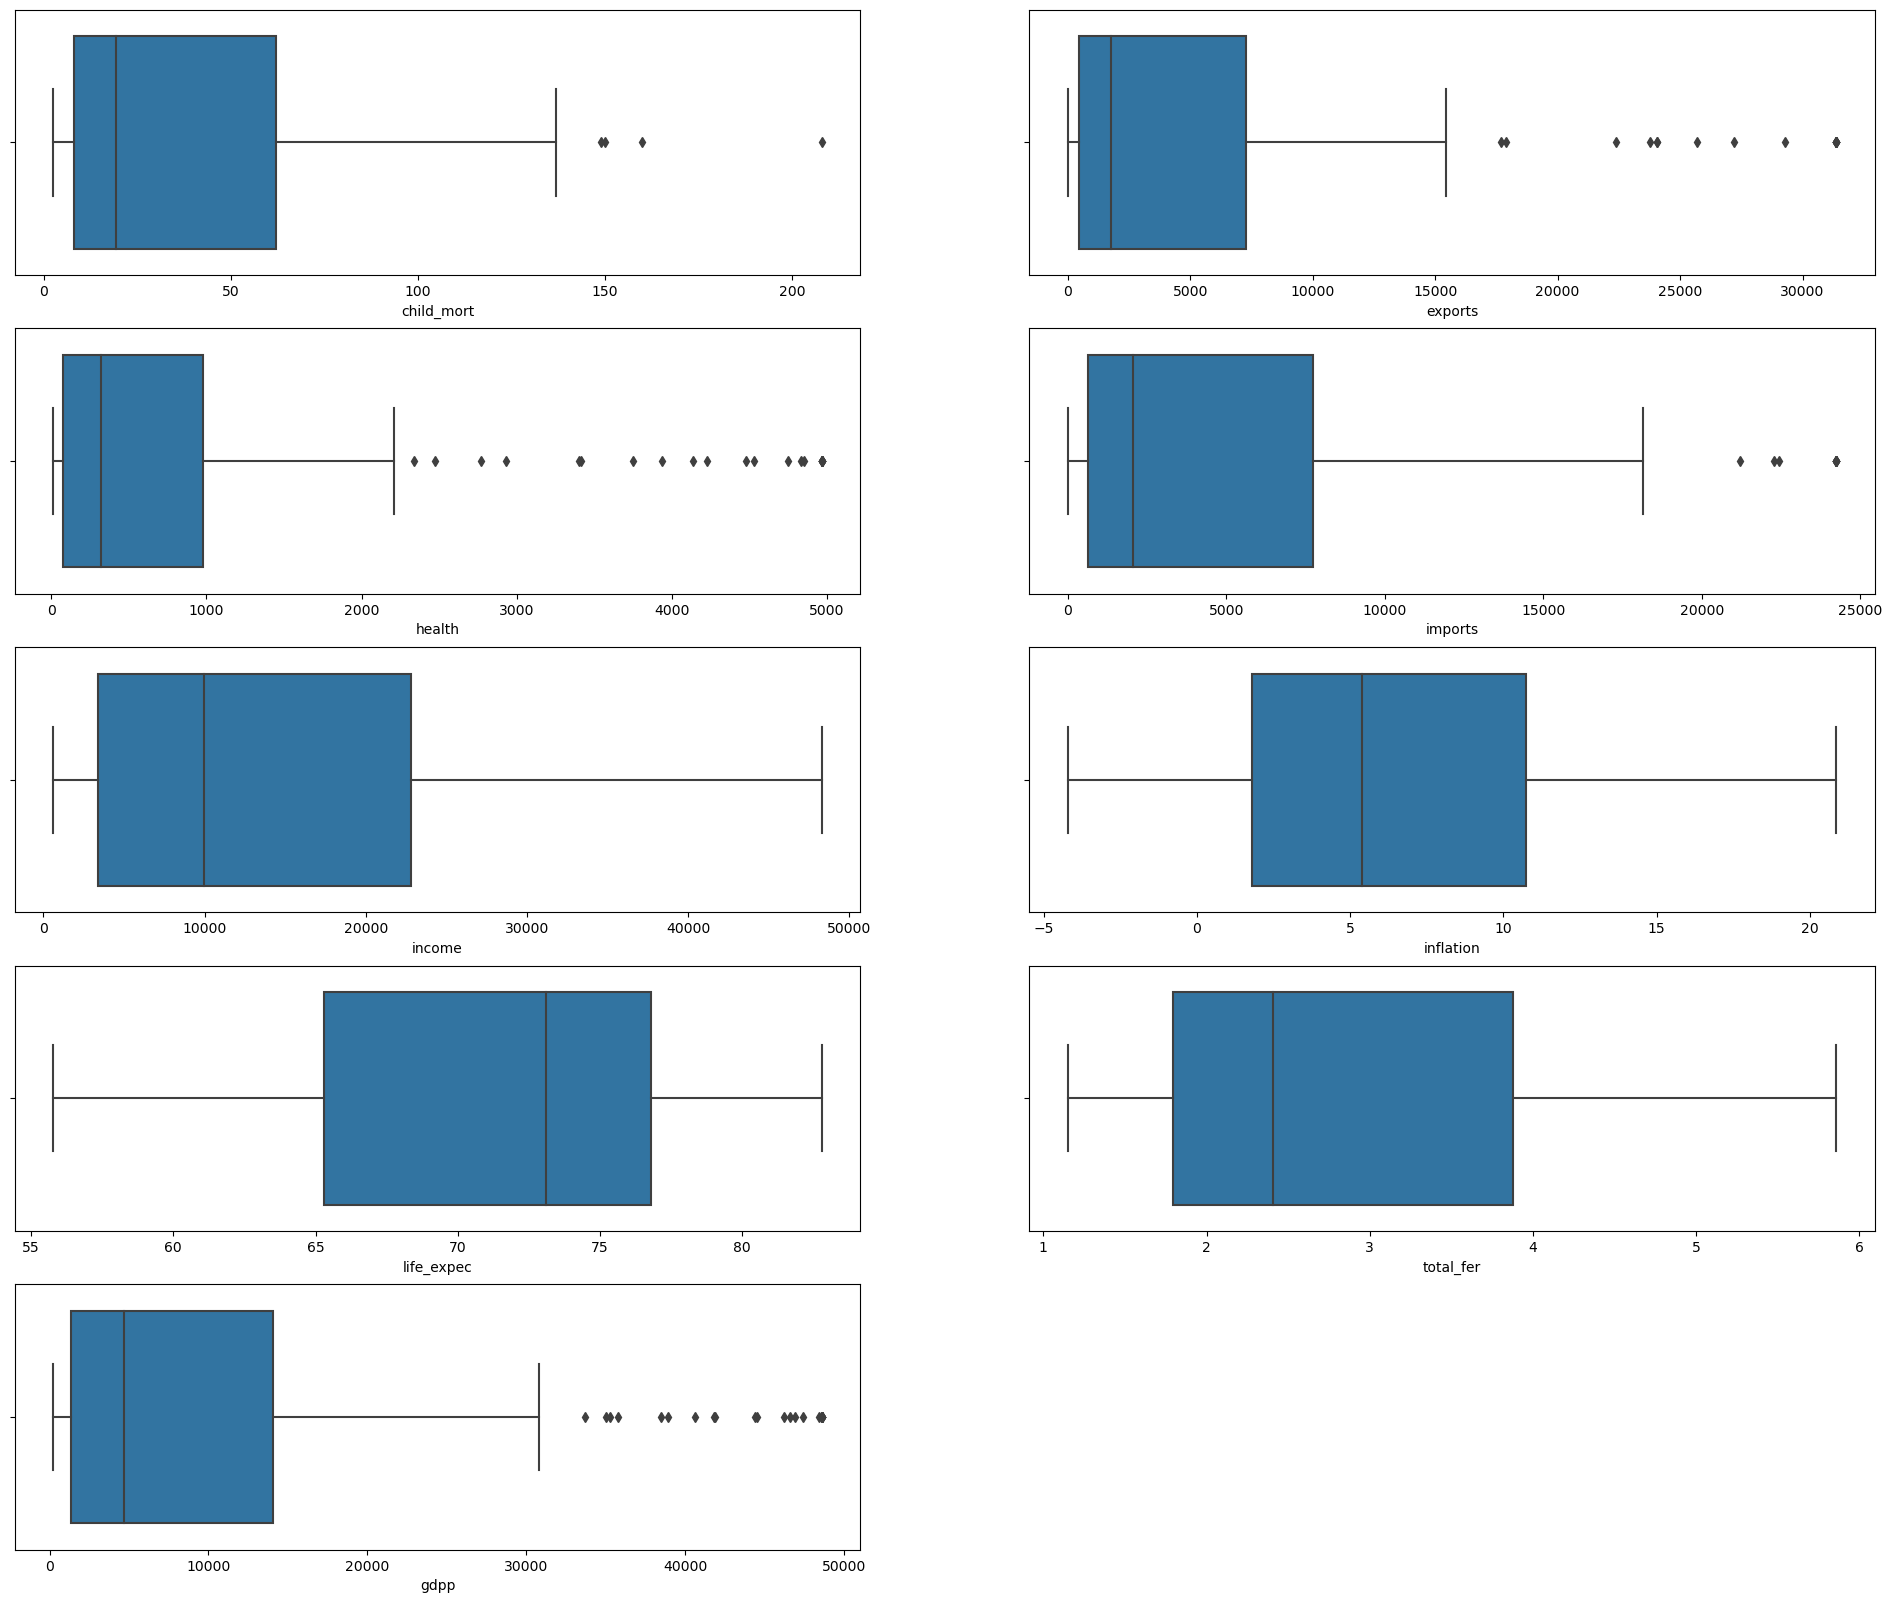

In [46]:
plt.figure(figsize=(24,20))
for i in enumerate(features):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x= i[1], data = df)

In [47]:
df.describe()

child_mort       exports       health       imports        income  \
count  167.000000    167.000000   167.000000    167.000000    167.000000   
mean    38.270060   5783.114656   954.012480   5140.089474  15738.760479   
std     40.328931   8580.053847  1453.426636   6696.210005  14787.154215   
min      2.600000      1.076920    12.821200      0.651092    609.000000   
25%      8.250000    447.140000    78.535500    640.215000   3355.000000   
50%     19.300000   1777.440000   321.886000   2045.580000   9960.000000   
75%     62.100000   7278.000000   976.940000   7719.600000  22800.000000   
max    208.000000  31385.100000  4966.701000  24241.560000  48290.000000   

        inflation  life_expec   total_fer          gdpp  
count  167.000000  167.000000  167.000000    167.000000  
mean     6.929317   70.863593    2.917479  11998.826347  
std      6.384357    8.085376    1.443771  15158.213199  
min     -4.210000   55.780000    1.150000    231.000000  
25%      1.810000   65.300000    1.795000   1330.000000  
50%      5.390000   73.100000    2.410000   4660.000000  
75%     10.750000   76.800000    3.880000  14050.000000  
max     20.870000   82.800000    5.861000  48610.000000

7. Data preparation 2

In [48]:
df_drop_country = df.copy()
country = df_drop_country.pop('country')

In [49]:
df_drop_country.head()

child_mort  exports    health   imports   income  inflation  life_expec  \
0        90.2    55.30   41.9174   248.297   1610.0       9.44        56.2   
1        16.6  1145.20  267.8950  1987.740   9930.0       4.49        76.3   
2        27.3  1712.64  185.9820  1400.440  12900.0      16.10        76.5   
3       119.0  2199.19  100.6050  1514.370   5900.0      20.87        60.1   
4        10.3  5551.00  735.6600  7185.800  19100.0       1.44        76.8   

   total_fer   gdpp  
0      5.820    553  
1      1.650   4090  
2      2.890   4460  
3      5.861   3530  
4      2.130  12200

In [50]:
country.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [51]:
df.describe()

child_mort       exports       health       imports        income  \
count  167.000000    167.000000   167.000000    167.000000    167.000000   
mean    38.270060   5783.114656   954.012480   5140.089474  15738.760479   
std     40.328931   8580.053847  1453.426636   6696.210005  14787.154215   
min      2.600000      1.076920    12.821200      0.651092    609.000000   
25%      8.250000    447.140000    78.535500    640.215000   3355.000000   
50%     19.300000   1777.440000   321.886000   2045.580000   9960.000000   
75%     62.100000   7278.000000   976.940000   7719.600000  22800.000000   
max    208.000000  31385.100000  4966.701000  24241.560000  48290.000000   

        inflation  life_expec   total_fer          gdpp  
count  167.000000  167.000000  167.000000    167.000000  
mean     6.929317   70.863593    2.917479  11998.826347  
std      6.384357    8.085376    1.443771  15158.213199  
min     -4.210000   55.780000    1.150000    231.000000  
25%      1.810000   65.300000    1.795000   1330.000000  
50%      5.390000   73.100000    2.410000   4660.000000  
75%     10.750000   76.800000    3.880000  14050.000000  
max     20.870000   82.800000    5.861000  48610.000000

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    float64
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 13.2+ KB


8. Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_drop_country)
df_scaled

array([[ 1.29153238, -0.66958102, -0.62943544, ..., -1.81904889,
         2.01642065, -0.75736169],
       [-0.5389489 , -0.54217181, -0.47348864, ...,  0.67439751,
        -0.88053487, -0.52332107],
       [-0.27283273, -0.47583812, -0.53001667, ...,  0.69920792,
        -0.01909006, -0.49883845],
       ...,
       [-0.37231541, -0.56578559, -0.59652699, ...,  0.27743092,
        -0.6721208 , -0.70727157],
       [ 0.44841668, -0.63010392, -0.61153387, ..., -0.41726062,
         1.21750006, -0.70727157],
       [ 1.11495062, -0.61289625, -0.59901824, ..., -1.87115075,
         1.72464096, -0.69734618]])

In [54]:
df_scaled.shape

(167, 9)

In [55]:
df_scaled= pd.DataFrame(df_scaled, columns = df.columns[1: ])

df_scaled.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -0.669581 -0.629435 -0.732729 -0.958349   0.394438   -1.819049   
1   -0.538949 -0.542172 -0.473489 -0.472182 -0.394006  -0.383226    0.674398   
2   -0.272833 -0.475838 -0.530017 -0.560152 -0.192552   1.440750    0.699208   
3    2.007808 -0.418960 -0.588935 -0.543087 -0.667360   2.190136   -1.335246   
4   -0.695634 -0.027134 -0.150685  0.306422  0.227992  -0.862393    0.736424   

   total_fer      gdpp  
0   2.016421 -0.757362  
1  -0.880535 -0.523321  
2  -0.019090 -0.498838  
3   2.044904 -0.560376  
4  -0.547072  0.013312

9. Model Building

K-means is a clustering algorithm that aims to partition a set of data points into K clusters, where each point belongs to the cluster with the nearest mean (center). The algorithm works as follows:

Initialization: Randomly choose K data points as initial centroids.

Assignment: Assign each data point to the cluster with the nearest centroid. This is done by calculating the distance between each point and each centroid, and assigning the point to the cluster with the closest centroid.

Update: Recalculate the centroids of each cluster as the mean of all the data points assigned to that cluster.

Repeat: Repeat steps 2 and 3 until the algorithm converges, which means that the assignments no longer change or only change minimally.

Termination: When the algorithm converges, the final clusters are the ones that were created during the last iteration.

The goal of the K-means algorithm is to minimize the sum of squared distances between each data point and its assigned centroid. This is known as the within-cluster sum of squares (WCSS) and is used as a measure of how well the data points are clustered.

K-means is a simple and widely used clustering algorithm that can work well on many types of data. However, it has some limitations, such as being sensitive to the initial choice of centroids and the number of clusters K, and being prone to local optima. Therefore, it is often necessary to run the algorithm multiple times with different initializations and choose the best result based on some criterion, such as the WCSS.

Finding the Optimal Number of Clusters
We don't know which cluster points to start with , so we will take help of Silhouette score and Elbow Curve to get the right number of Clusters.

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered.

In [56]:
df_scaled.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -0.669581 -0.629435 -0.732729 -0.958349   0.394438   -1.819049   
1   -0.538949 -0.542172 -0.473489 -0.472182 -0.394006  -0.383226    0.674398   
2   -0.272833 -0.475838 -0.530017 -0.560152 -0.192552   1.440750    0.699208   
3    2.007808 -0.418960 -0.588935 -0.543087 -0.667360   2.190136   -1.335246   
4   -0.695634 -0.027134 -0.150685  0.306422  0.227992  -0.862393    0.736424   

   total_fer      gdpp  
0   2.016421 -0.757362  
1  -0.880535 -0.523321  
2  -0.019090 -0.498838  
3   2.044904 -0.560376  
4  -0.547072  0.013312

Steps would be as follows :

Choose the value of K (2 to 11) and calculate the silhoutte score for all of them to see which value of k suits better

calculate Silhouette score

calculate Elbow curve-ssd

perform k mean swith no of clusters as suggested by Silhoutte's score or elbow curve. Try with two 


different cluster nos and match the result.

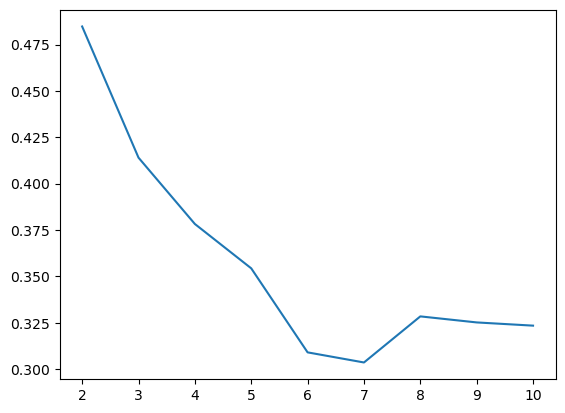

In [57]:
from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df_scaled)
    ss.append([k, silhouette_score(df_scaled, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

The highest Silhoutte score is at k=2, but 2 parttition/segmentation does not make any sense so we will go with k=3 (the next hightest score).

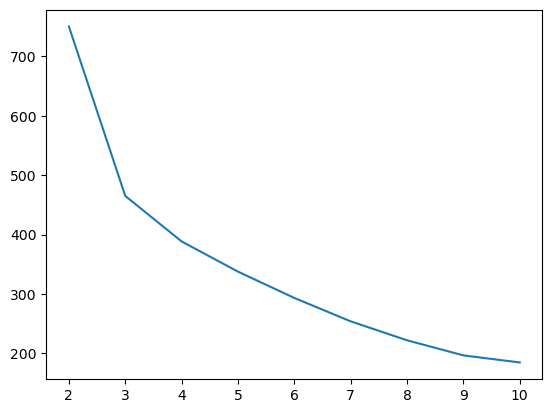

In [58]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df_scaled)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

Looking at the above elbow curve it looks good to proceed with 3 cluster , as post k=3, the drop is not so significant.

Clustering with k=3

In [59]:
kmean = KMeans(n_clusters = 3, random_state = 50) #random state is chosen so that the labes do nto change for each data point.
kmean.fit(df_scaled)

KMeans(n_clusters=3, random_state=50)

In [60]:
df_kmean = df.copy()

In [61]:
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

label
0      1
1      0
2      0
3      1
4      0

In [62]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer   gdpp  label  
0       9.44        56.2      5.820    553      1  
1       4.49        76.3      1.650   4090      0  
2      16.10        76.5      2.890   4460      0  
3      20.87        60.1      5.861   3530      1  
4       1.44        76.8      2.130  12200      0

Visualization of clusters with k=3

In [63]:
df_kmean.label.value_counts()

0    82
1    48
2    37
Name: label, dtype: int64

In [64]:
import seaborn as sns

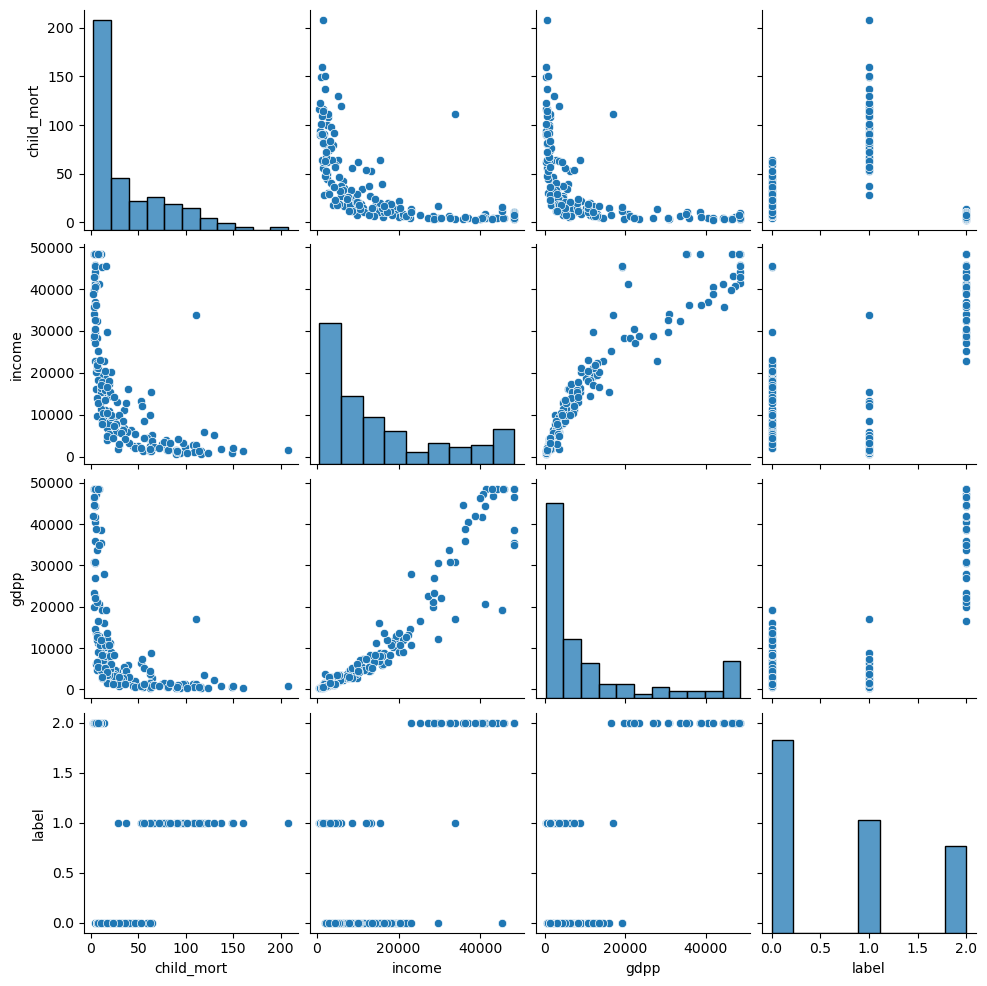

In [65]:
df_kmean_num= df_kmean[['child_mort','income', 'gdpp', 'label']]
sns.pairplot(df_kmean_num)
plt.show()

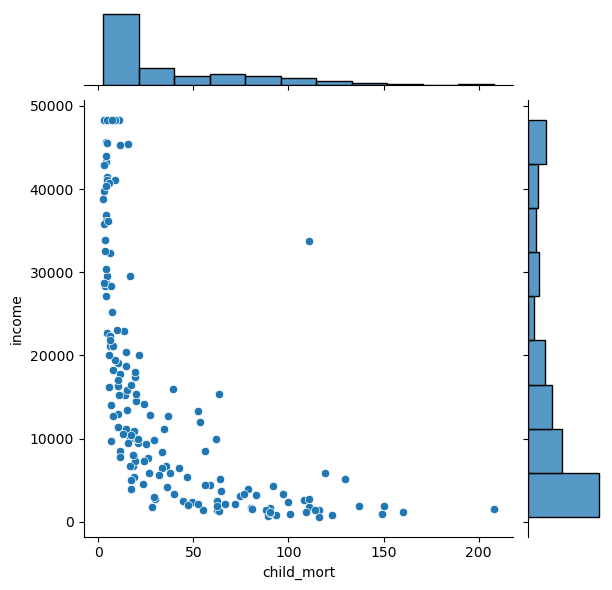

In [66]:
sns.jointplot(x='child_mort', y='income', data=df_kmean)

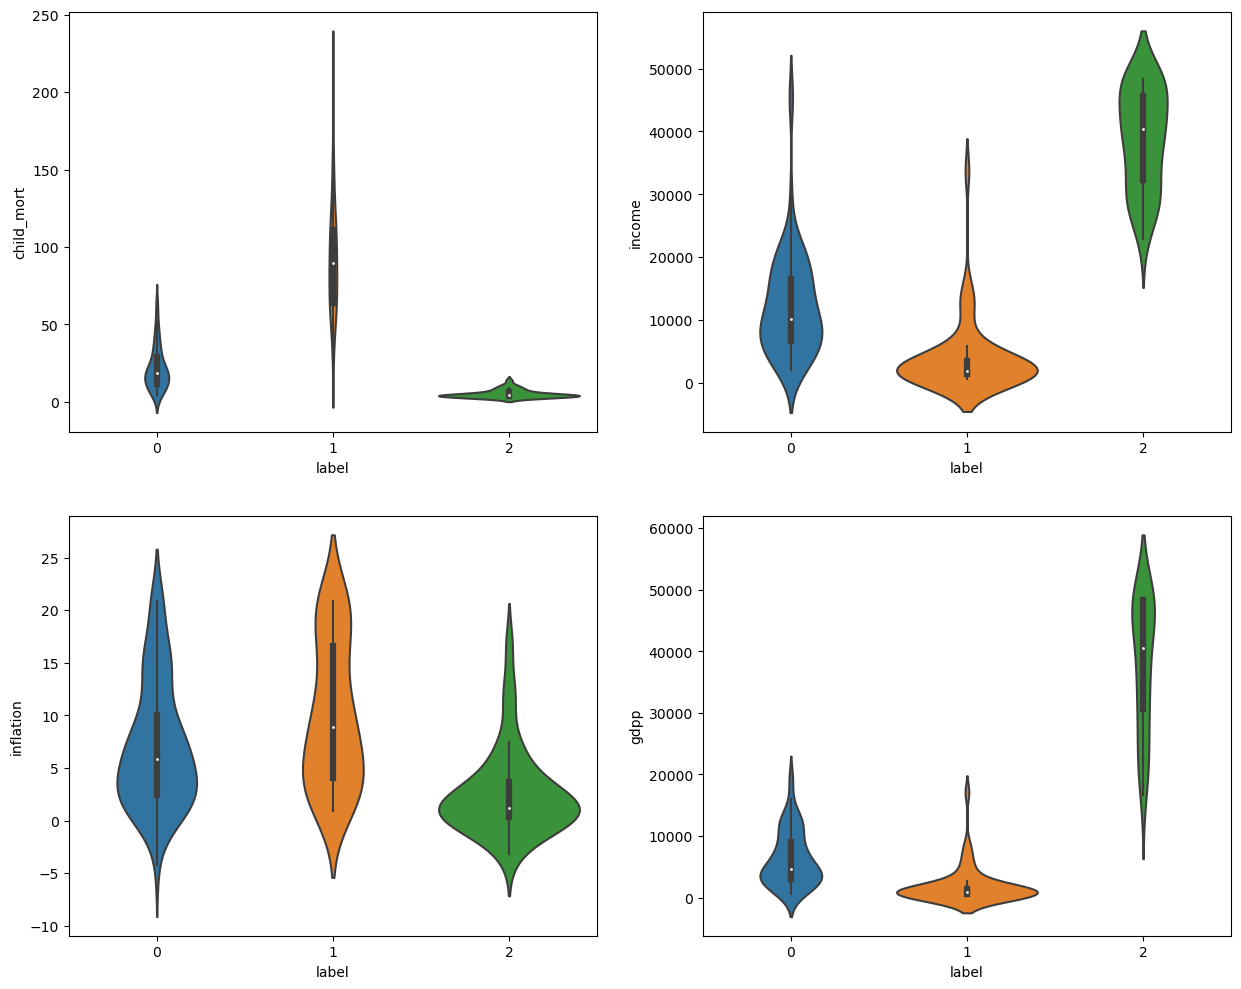

In [67]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'label', y = 'child_mort', data = df_kmean,ax=axes[0][0])
sns.violinplot(x = 'label', y = 'income', data = df_kmean,ax=axes[0][1])
sns.violinplot(x = 'label', y = 'inflation', data=df_kmean,ax=axes[1][0])
sns.violinplot(x = 'label', y = 'gdpp', data=df_kmean,ax=axes[1][1])
plt.show()

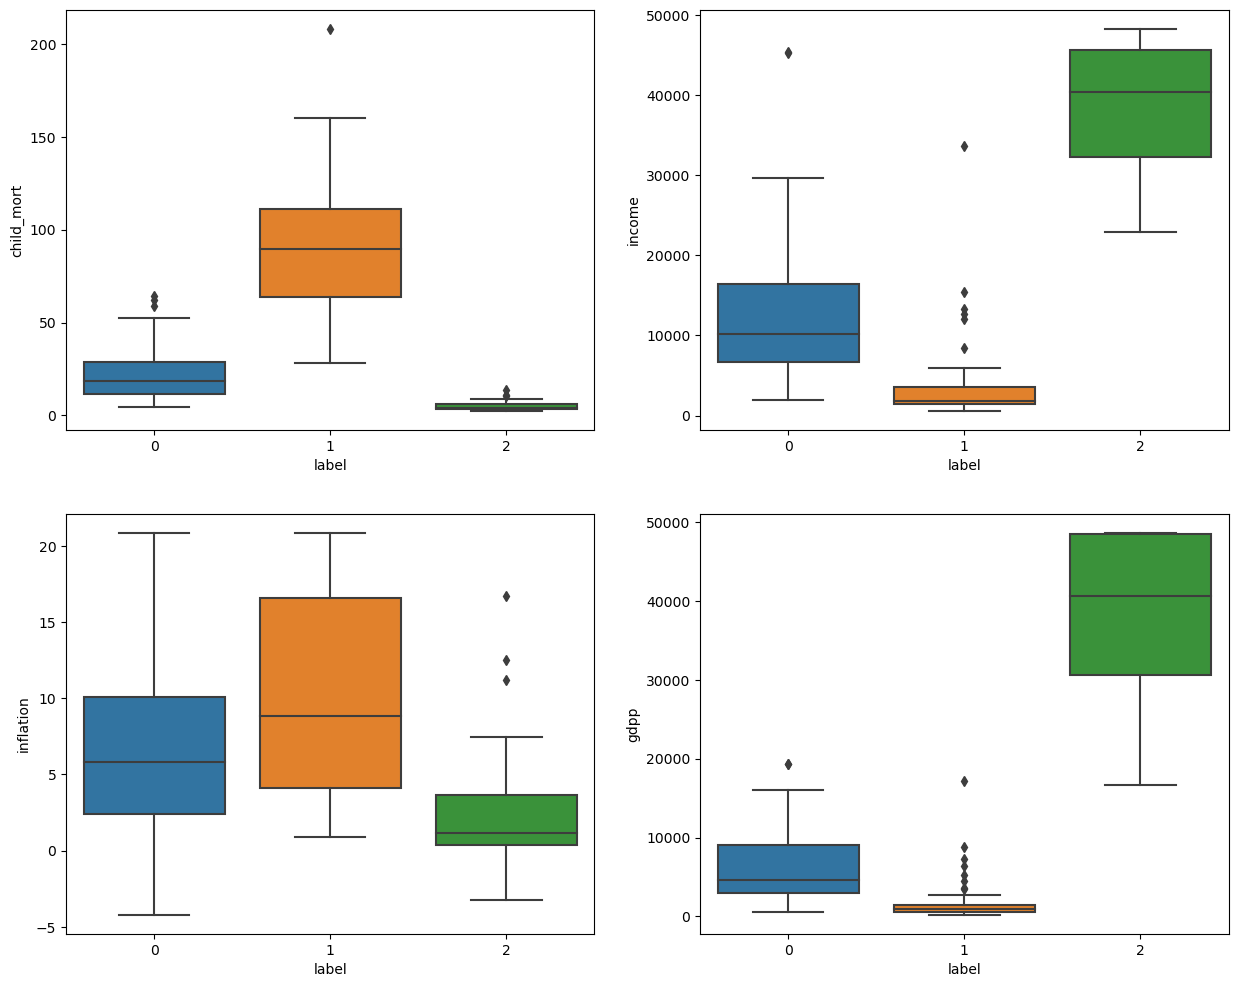

In [68]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'label', y = 'child_mort', data = df_kmean,ax=axes[0][0])
sns.boxplot(x = 'label', y = 'income', data = df_kmean,ax=axes[0][1])
sns.boxplot(x = 'label', y = 'inflation', data=df_kmean,ax=axes[1][0])
sns.boxplot(x = 'label', y = 'gdpp', data=df_kmean,ax=axes[1][1])
plt.show()

clustering for k=3

This is a step for Making sense out of the clsuters

In [69]:
df_kmean.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer   gdpp  label  
0       9.44        56.2      5.820    553      1  
1       4.49        76.3      1.650   4090      0  
2      16.10        76.5      2.890   4460      0  
3      20.87        60.1      5.861   3530      1  
4       1.44        76.8      2.130  12200      0

<AxesSubplot: xlabel='label'>

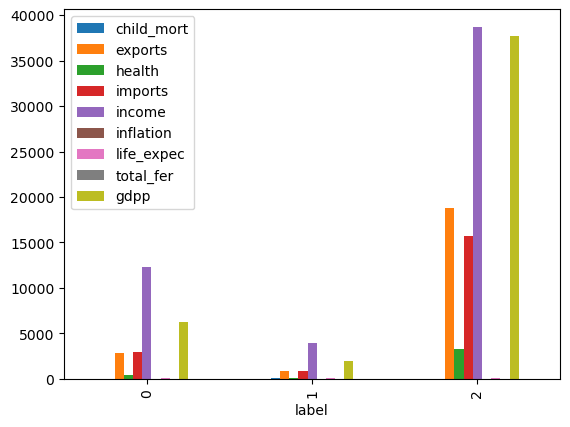

In [70]:
df_kmean.drop('country', axis = 1).groupby('label').mean().plot(kind = 'bar')

As we have taken all the colums so its not very clear, we will now only take 3 columns 'gdpp', 'child_mort' and 'income' as from business point of view these three attributes are more important.

<AxesSubplot: xlabel='label'>

<Figure size 2000x1600 with 0 Axes>

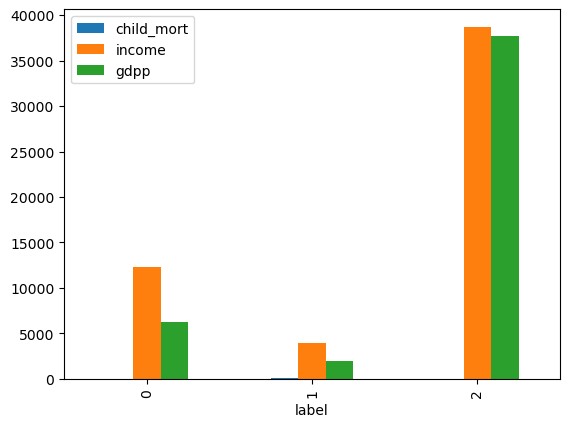

In [71]:
plt.figure(figsize=(20,16))
df_kmean.drop(['country', 'exports', 'health', 'imports', 'inflation', 'life_expec','total_fer'], axis = 1).groupby('label').mean().plot(kind = 'bar')

Now we can see the features of these 3 clusters. Now we are targetting the low income, low GDP and low income, and high child mortality, so let's filter data for cluster 1 as this segment looks the most needy one.

In [72]:
df_kmean[df_kmean['label'] == 1].sort_values(by = ['child_mort', 'income', 'gdpp'], ascending = [False, True, True]).head(5)

country  child_mort  exports   health  imports  income  \
66                      Haiti       208.0  101.286  45.7442  428.314  1500.0   
132              Sierra Leone       160.0   67.032  52.2690  137.655  1220.0   
32                       Chad       150.0  330.096  40.6341  390.195  1930.0   
31   Central African Republic       149.0   52.628  17.7508  118.190   888.0   
97                       Mali       137.0  161.424  35.2584  248.508  1870.0   

     inflation  life_expec  total_fer  gdpp  label  
66        5.45       55.78      3.330   662      1  
132      17.20       55.78      5.200   399      1  
32        6.39       56.50      5.861   897      1  
31        2.01       55.78      5.210   446      1  
97        4.37       59.50      5.861   708      1

RESULT:-
The 5 countries which are in direct need of help as per k means clustering are "Haiti", "Sierra Leone", "Chad", "Central African Republic", "Mali"

In [73]:
kmean = KMeans(n_clusters = 4, random_state = 50) 
kmean.fit(df_scaled)

KMeans(n_clusters=4, random_state=50)

In [74]:
df_kmean = df.copy()

In [75]:
df_kmean.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2      5.820    553  
1       4.49        76.3      1.650   4090  
2      16.10        76.5      2.890   4460  
3      20.87        60.1      5.861   3530  
4       1.44        76.8      2.130  12200

In [76]:
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

label
0      0
1      1
2      1
3      0
4      3

In [77]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer   gdpp  label  
0       9.44        56.2      5.820    553      0  
1       4.49        76.3      1.650   4090      1  
2      16.10        76.5      2.890   4460      1  
3      20.87        60.1      5.861   3530      0  
4       1.44        76.8      2.130  12200      3

Visualization of clusters with K=4

In [78]:
df_kmean.label.value_counts()

1    71
0    48
3    28
2    20
Name: label, dtype: int64

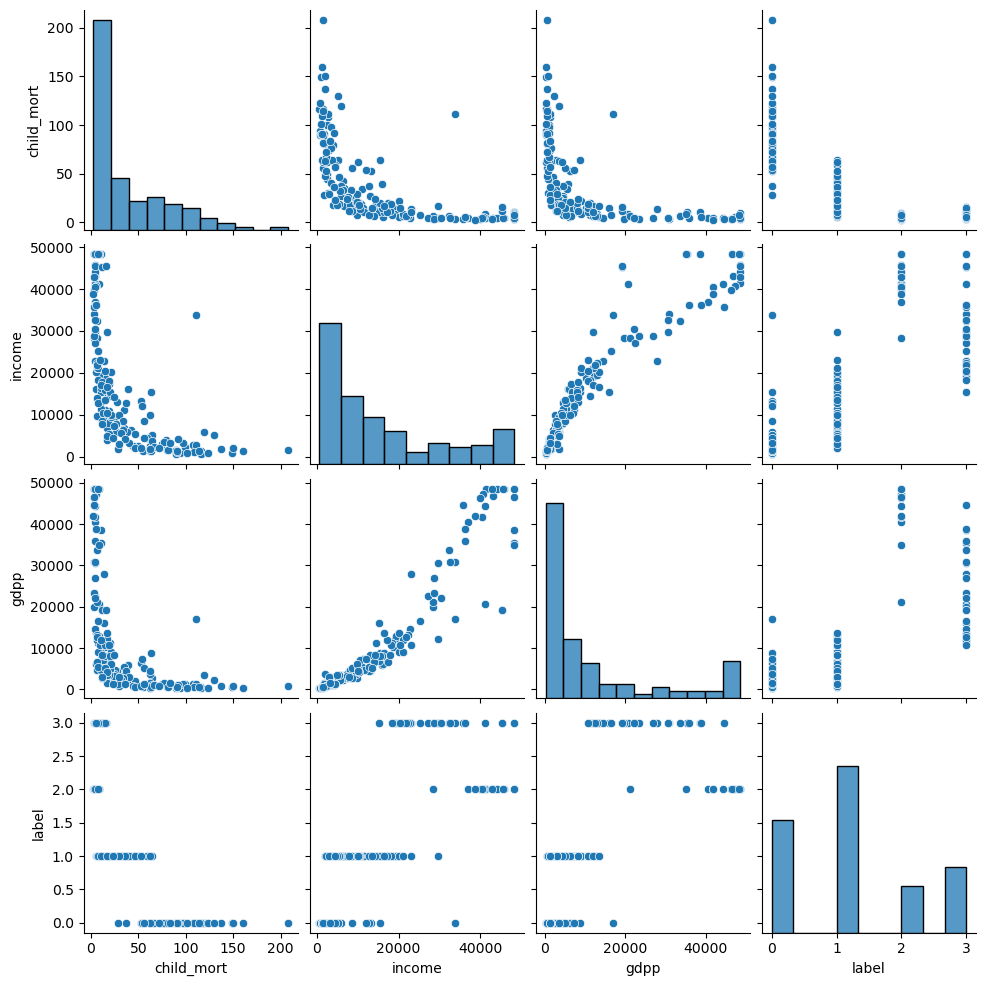

In [79]:
df_kmean_num= df_kmean[['child_mort','income', 'gdpp', 'label']]
sns.pairplot(df_kmean_num)
plt.show()

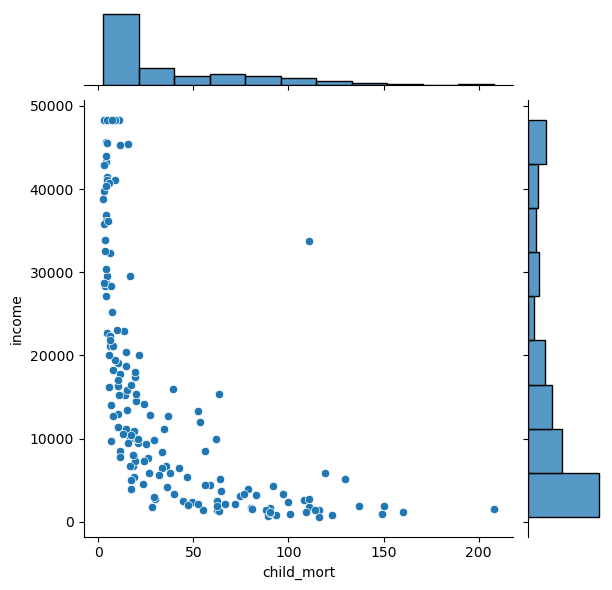

In [80]:
sns.jointplot(x='child_mort', y='income', data=df_kmean)

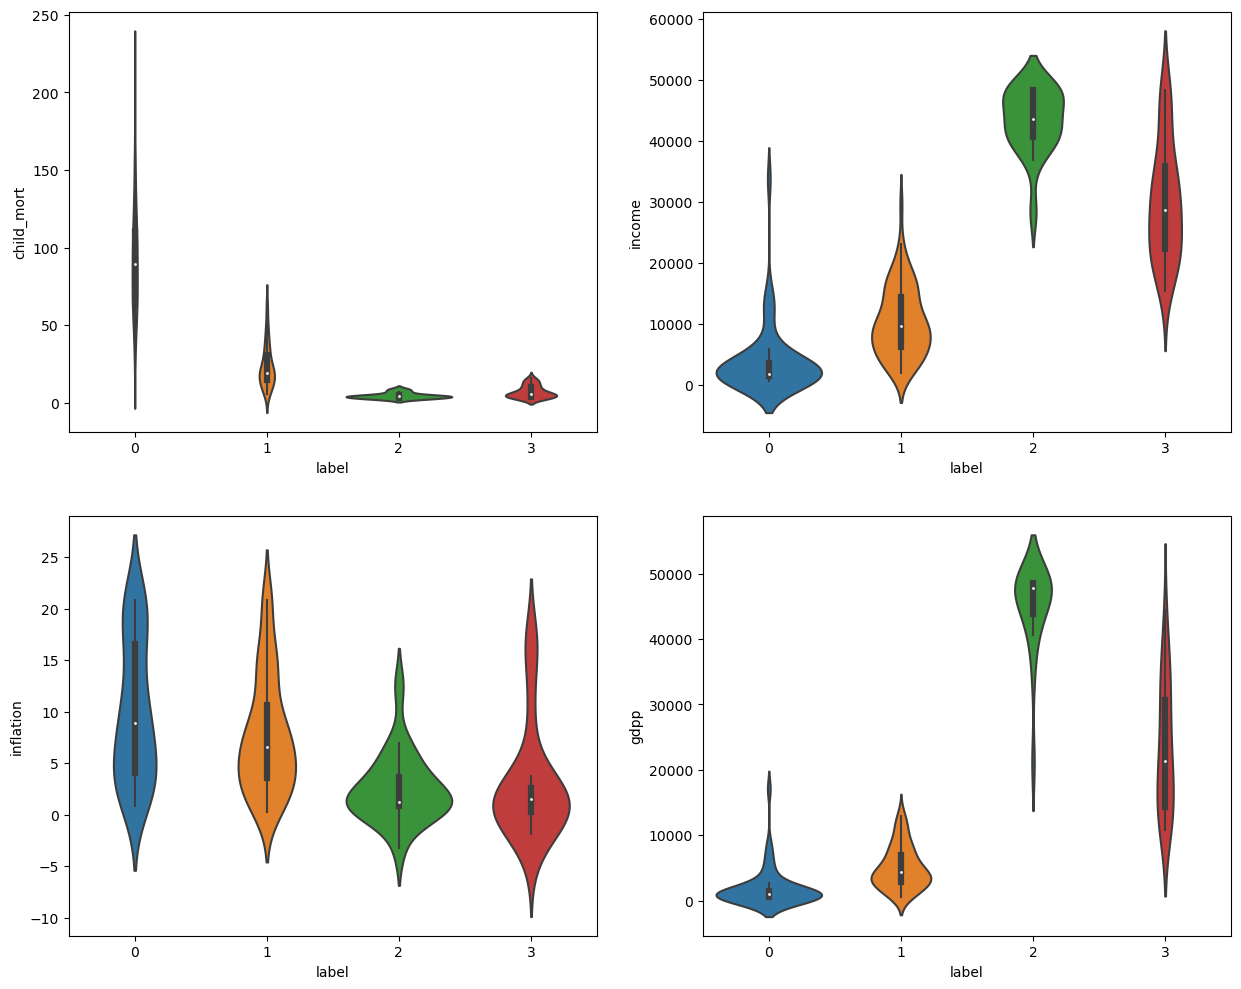

In [81]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'label', y = 'child_mort', data = df_kmean,ax=axes[0][0])
sns.violinplot(x = 'label', y = 'income', data = df_kmean,ax=axes[0][1])
sns.violinplot(x = 'label', y = 'inflation', data=df_kmean,ax=axes[1][0])
sns.violinplot(x = 'label', y = 'gdpp', data=df_kmean,ax=axes[1][1])
plt.show()

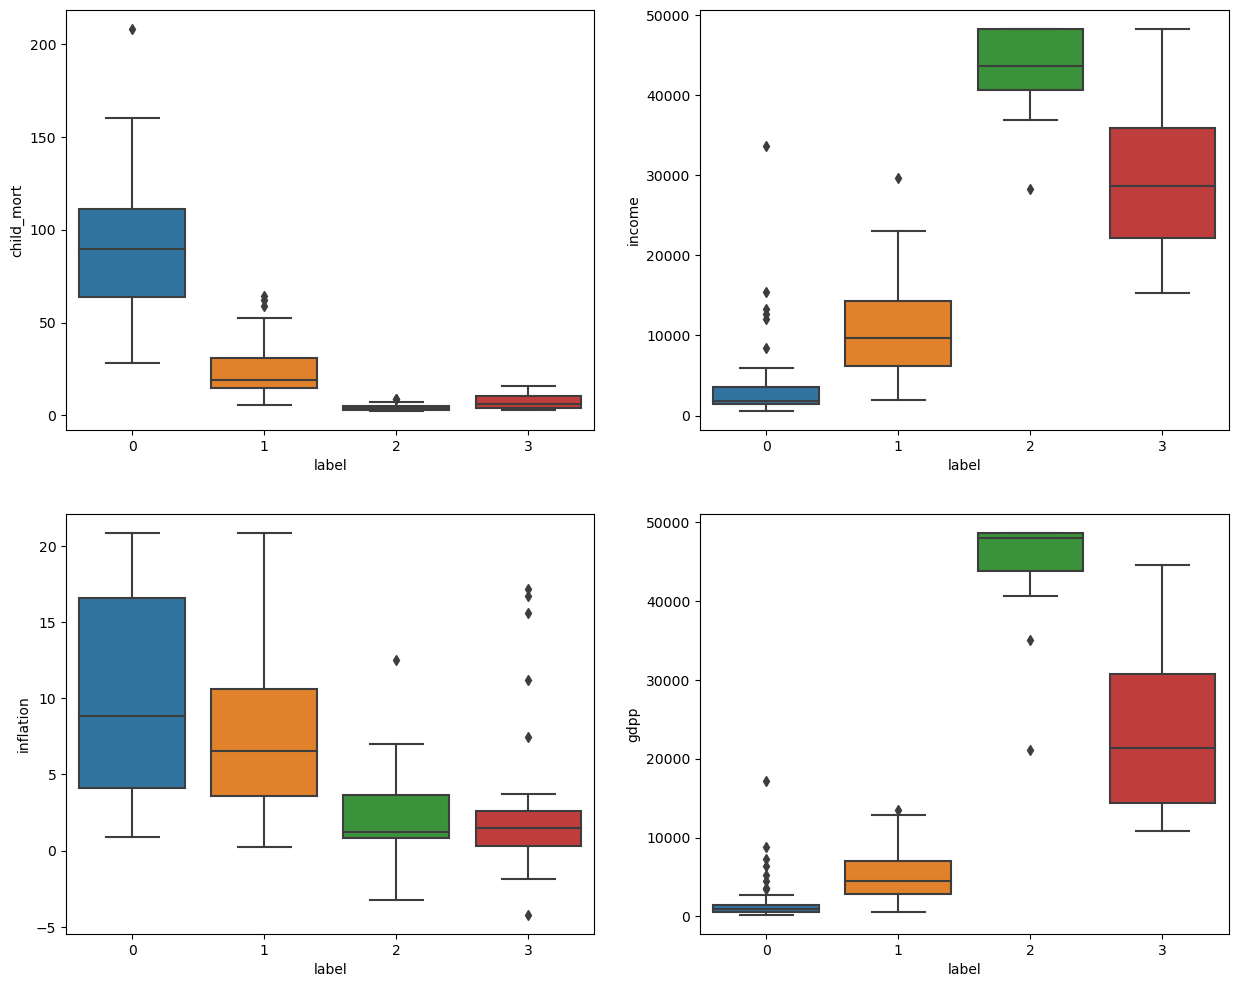

In [82]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'label', y = 'child_mort', data = df_kmean,ax=axes[0][0])
sns.boxplot(x = 'label', y = 'income', data = df_kmean,ax=axes[0][1])
sns.boxplot(x = 'label', y = 'inflation', data=df_kmean,ax=axes[1][0])
sns.boxplot(x = 'label', y = 'gdpp', data=df_kmean,ax=axes[1][1])
plt.show()

Clustering for 4 clusters


Making sense out of Cluster



As we have seen earlier, taking all the columns for cluster profiling does not result in clear profiles , we will now only take 3 columns 'gdpp', 'child_mort' and 'income' as from business point of view these three attributes are more important.

<AxesSubplot: xlabel='label'>

<Figure size 2400x2400 with 0 Axes>

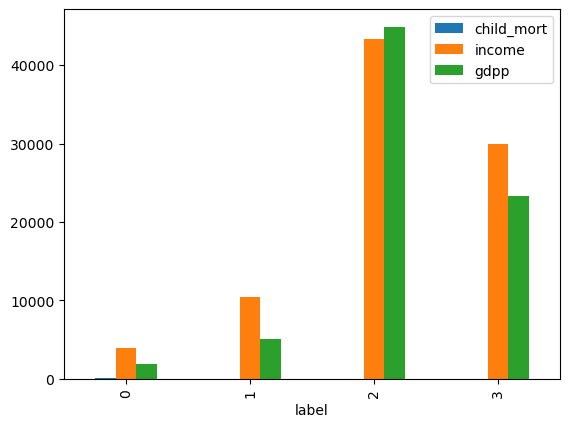

In [83]:
plt.figure(figsize=(24,24))
df_kmean.drop(['country', 'exports', 'health', 'imports', 'inflation', 'life_expec','total_fer'], axis = 1).groupby('label').mean().plot(kind = 'bar')

Here we can see with the visualisation of 4 clusters that , in this requirement making 4 clusters would be unnecesary and we should only use 3 clusters as done above to segment the countries, as 3 segments looks quite apt. Same was suggested by Elbow curve and Silhoutte score. So we will go with previously done analysis and same 5 countries which was suggested by the 3 clusters.

HIEARCHICAL CLUSTERING


Hierarchical clustering is a method of clustering objects or data points based on their similarity or distance. The basic idea behind hierarchical clustering is to group similar data points into clusters, and then group those clusters into even larger clusters, until all of the data points have been grouped together into a single cluster.

There are two types of hierarchical clustering methods: agglomerative and divisive.

Agglomerative hierarchical clustering is the most commonly used method. It starts by considering each data point as a separate cluster and then iteratively merges the closest clusters until all data points belong to one cluster. In each iteration, the two closest clusters are merged into a larger cluster, based on a chosen similarity metric, such as Euclidean distance or cosine similarity. The process continues until all data points belong to a single cluster.

Divisive hierarchical clustering, on the other hand, starts with a single cluster containing all data points and then iteratively divides it into smaller clusters until each data point belongs to its own cluster. The process starts by computing the distance between all pairs of data points and then finding the largest distance between any two points. The cluster is then divided along this axis, and the process continues recursively for each resulting cluster until each data point is in its own cluster.

In both agglomerative and divisive hierarchical clustering, the final result is a dendrogram, which is a tree-like diagram that shows the hierarchical relationship between the clusters. The height of each node in the dendrogram represents the distance between the clusters being merged or divided. The dendrogram can be cut at a chosen height to obtain a desired number of clusters.

Hierarchical clustering has several advantages, such as being able to visualize the hierarchical relationships between the clusters and not requiring the number of clusters to be specified in advance. However, it can also be computationally intensive and may not be suitable for large datasets.





In [84]:
df_scaled.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -0.669581 -0.629435 -0.732729 -0.958349   0.394438   -1.819049   
1   -0.538949 -0.542172 -0.473489 -0.472182 -0.394006  -0.383226    0.674398   
2   -0.272833 -0.475838 -0.530017 -0.560152 -0.192552   1.440750    0.699208   
3    2.007808 -0.418960 -0.588935 -0.543087 -0.667360   2.190136   -1.335246   
4   -0.695634 -0.027134 -0.150685  0.306422  0.227992  -0.862393    0.736424   

   total_fer      gdpp  
0   2.016421 -0.757362  
1  -0.880535 -0.523321  
2  -0.019090 -0.498838  
3   2.044904 -0.560376  
4  -0.547072  0.013312

In [85]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

Single Linkage:

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.

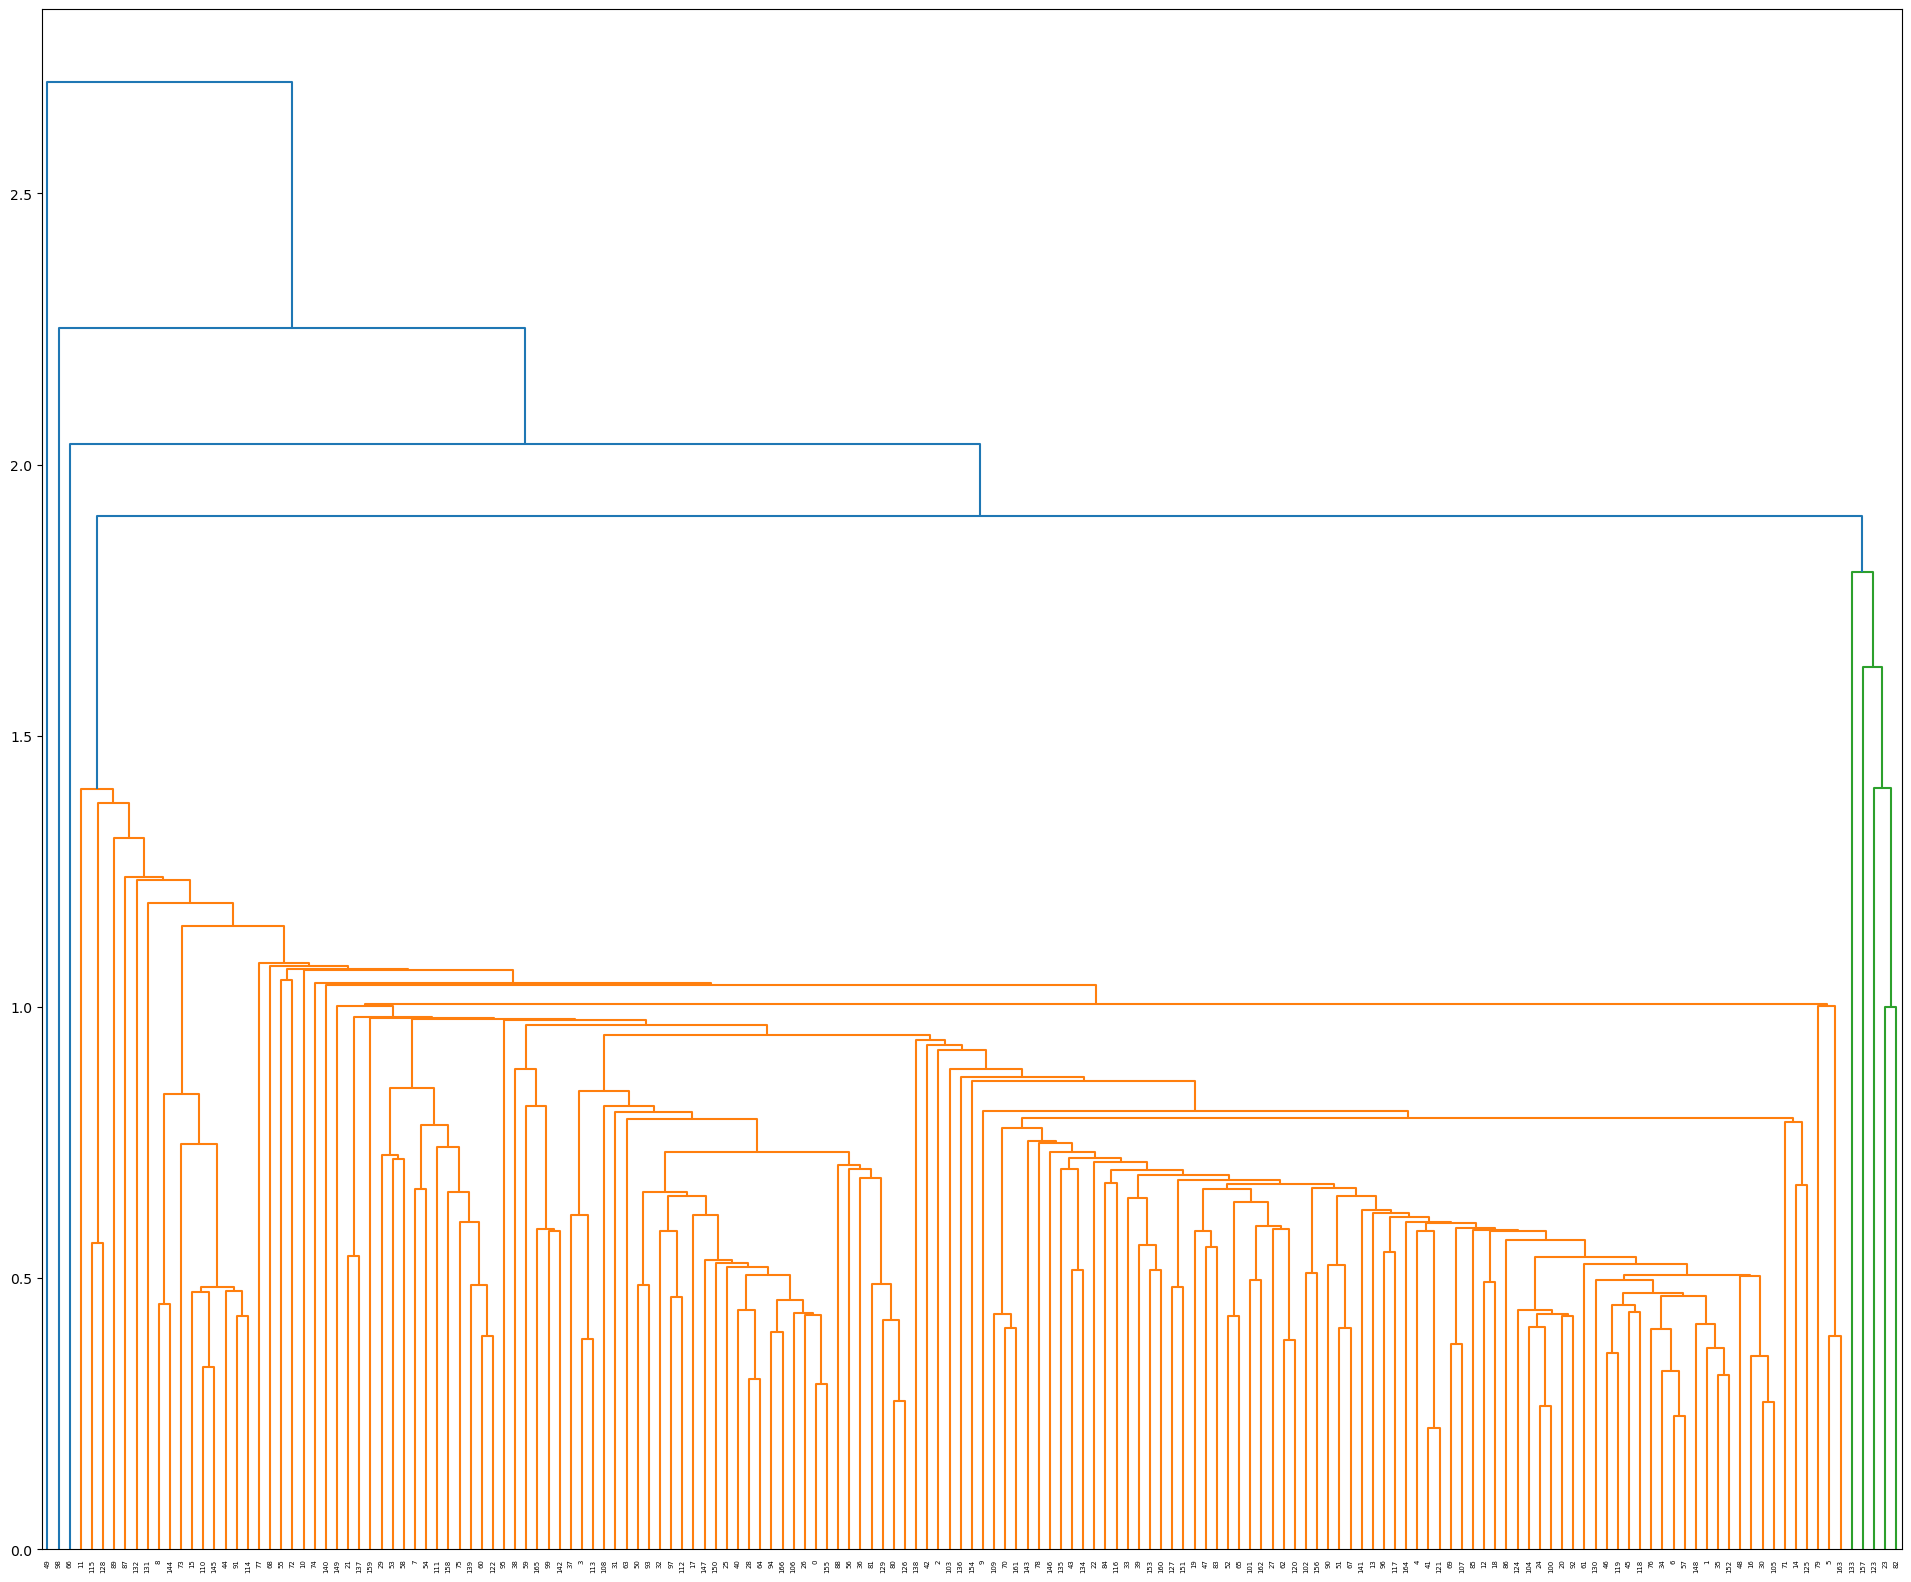

In [86]:
plt.figure(figsize=(24,20))
mergings = linkage(df_scaled, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

As we can seee here that the dendogram is not readable in single linkage, so we will proceed with complete linkage.

Complete Linkage

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

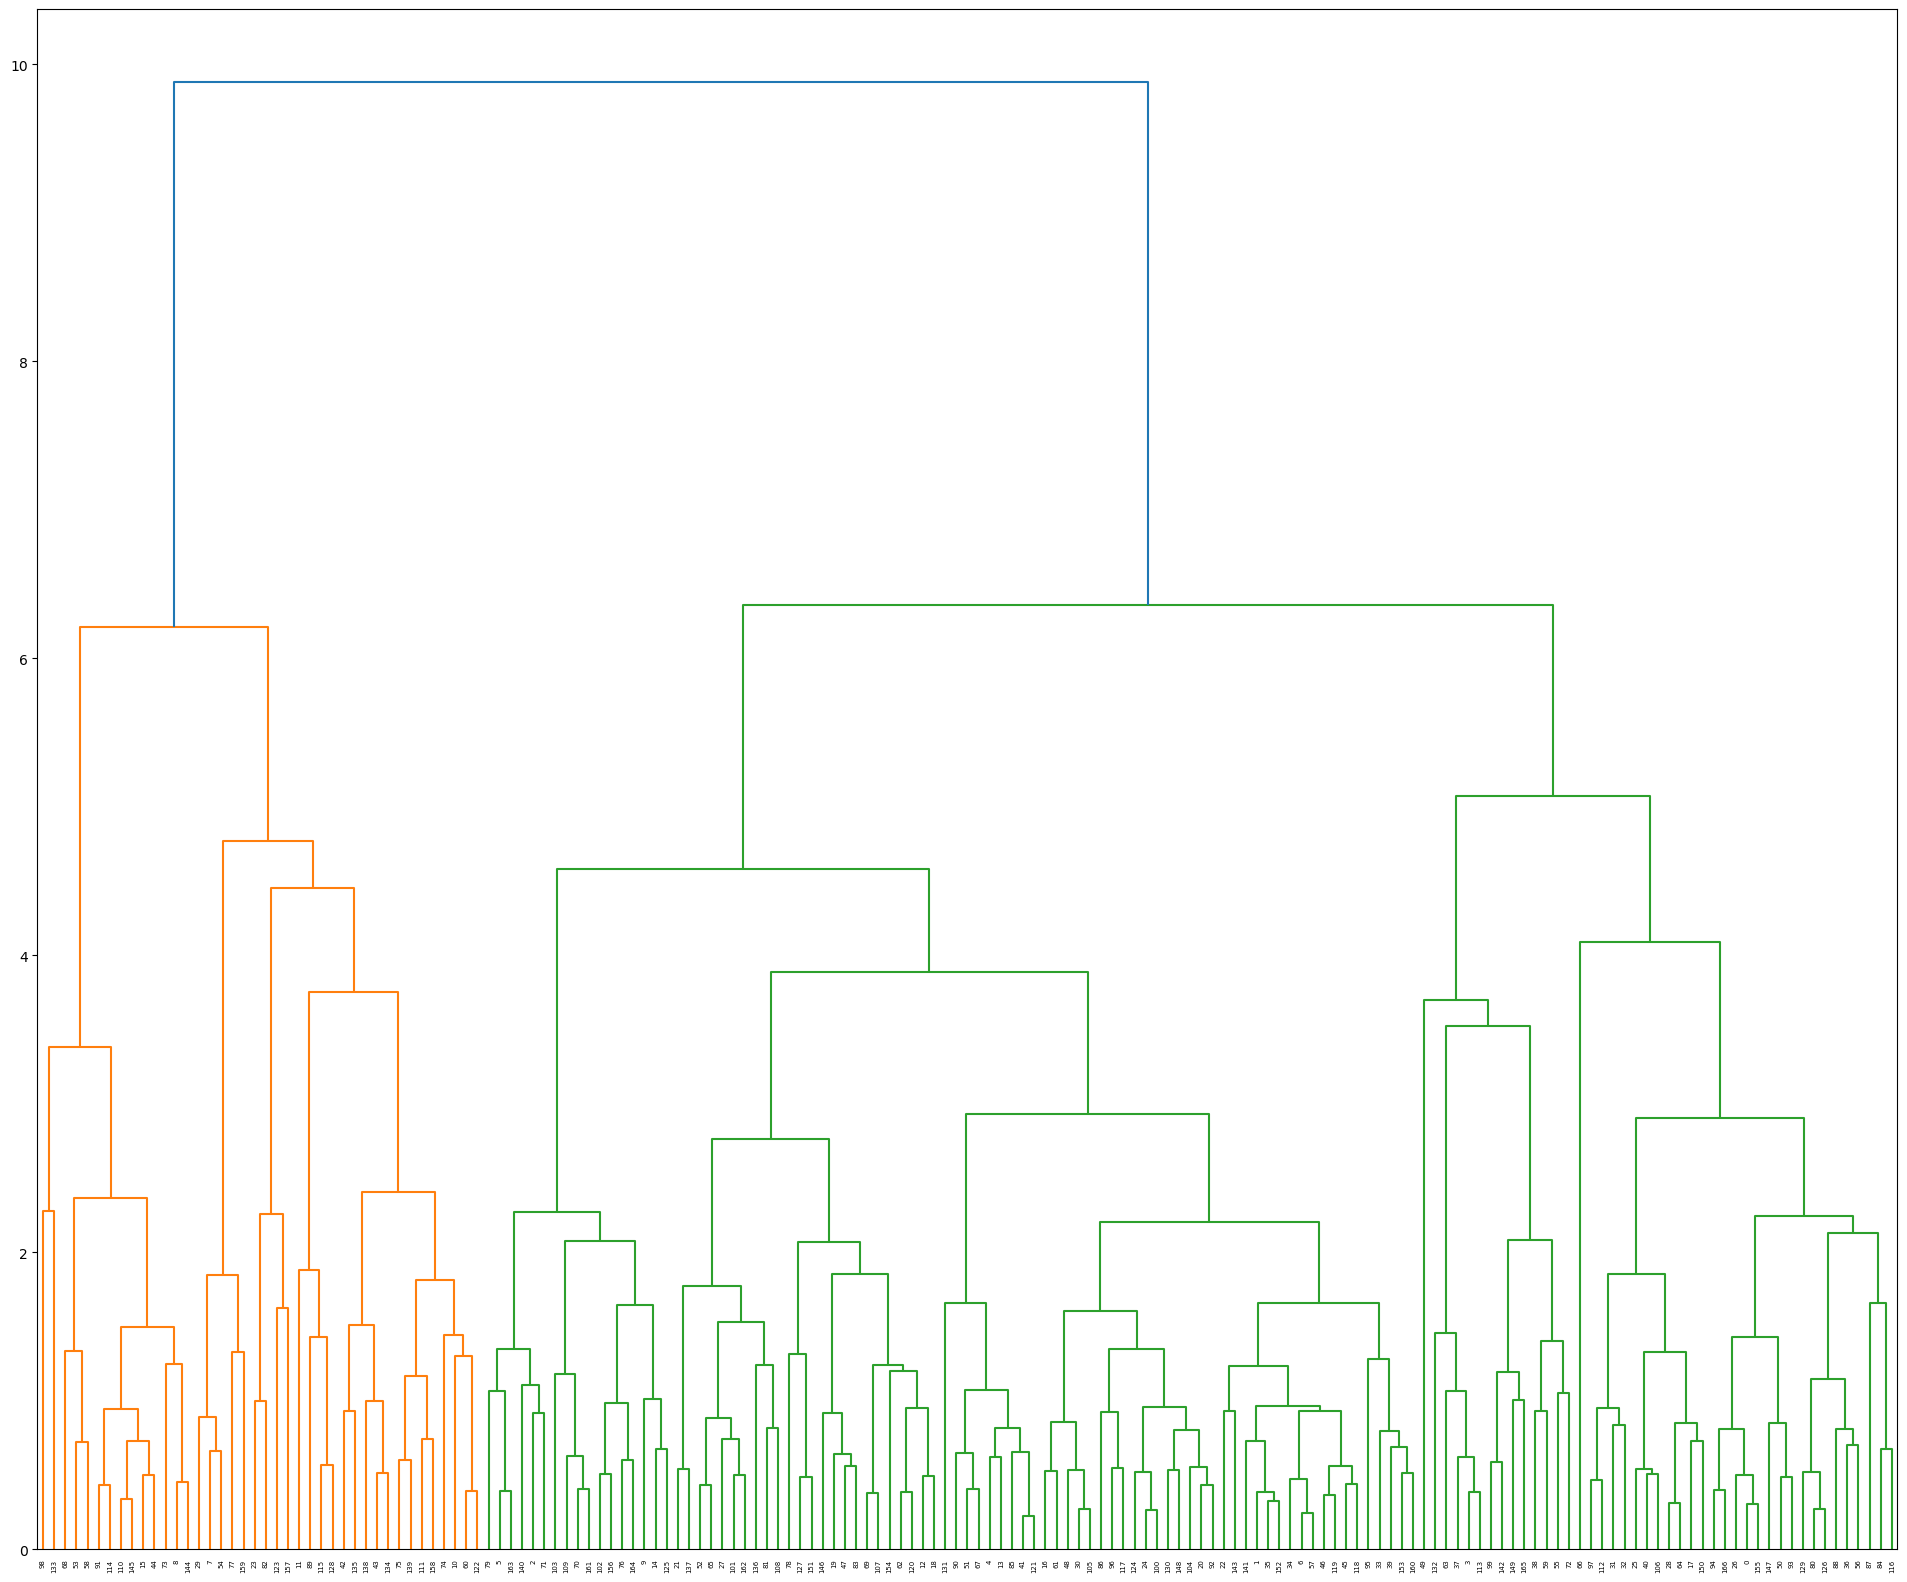

In [87]:
plt.figure(figsize=(24,20))
mergings = linkage(df_scaled, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

looking at this dendogranm , it makes more sense to cut the dendogram tree at 6 to get 4 cluster.

In [88]:
cut_tree(mergings, n_clusters=4)

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [2],
       [3],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [3],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [0],
       [0],
       [1],
       [0],
       [2],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [2],
       [2],
       [3],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [3],
       [2],
       [0],
       [0],
       [1],
       [3],
       [0],
       [2],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [3],
       [1],
       [1],
       [1],
       [0],
       [3],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [0],
       [1],
       [2],
    

In [89]:
cluster_labels=cut_tree(mergings, n_clusters=4).reshape(-1, )

In [90]:
df_scaled.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -0.669581 -0.629435 -0.732729 -0.958349   0.394438   -1.819049   
1   -0.538949 -0.542172 -0.473489 -0.472182 -0.394006  -0.383226    0.674398   
2   -0.272833 -0.475838 -0.530017 -0.560152 -0.192552   1.440750    0.699208   
3    2.007808 -0.418960 -0.588935 -0.543087 -0.667360   2.190136   -1.335246   
4   -0.695634 -0.027134 -0.150685  0.306422  0.227992  -0.862393    0.736424   

   total_fer      gdpp  
0   2.016421 -0.757362  
1  -0.880535 -0.523321  
2  -0.019090 -0.498838  
3   2.044904 -0.560376  
4  -0.547072  0.013312

In [91]:
df.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2      5.820    553  
1       4.49        76.3      1.650   4090  
2      16.10        76.5      2.890   4460  
3      20.87        60.1      5.861   3530  
4       1.44        76.8      2.130  12200

In [92]:
df['cluster_labels']=cluster_labels

In [93]:
df.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer   gdpp  cluster_labels  
0       9.44        56.2      5.820    553               0  
1       4.49        76.3      1.650   4090               1  
2      16.10        76.5      2.890   4460               1  
3      20.87        60.1      5.861   3530               0  
4       1.44        76.8      2.130  12200               1

Visualisation of clusters for 4 clusters

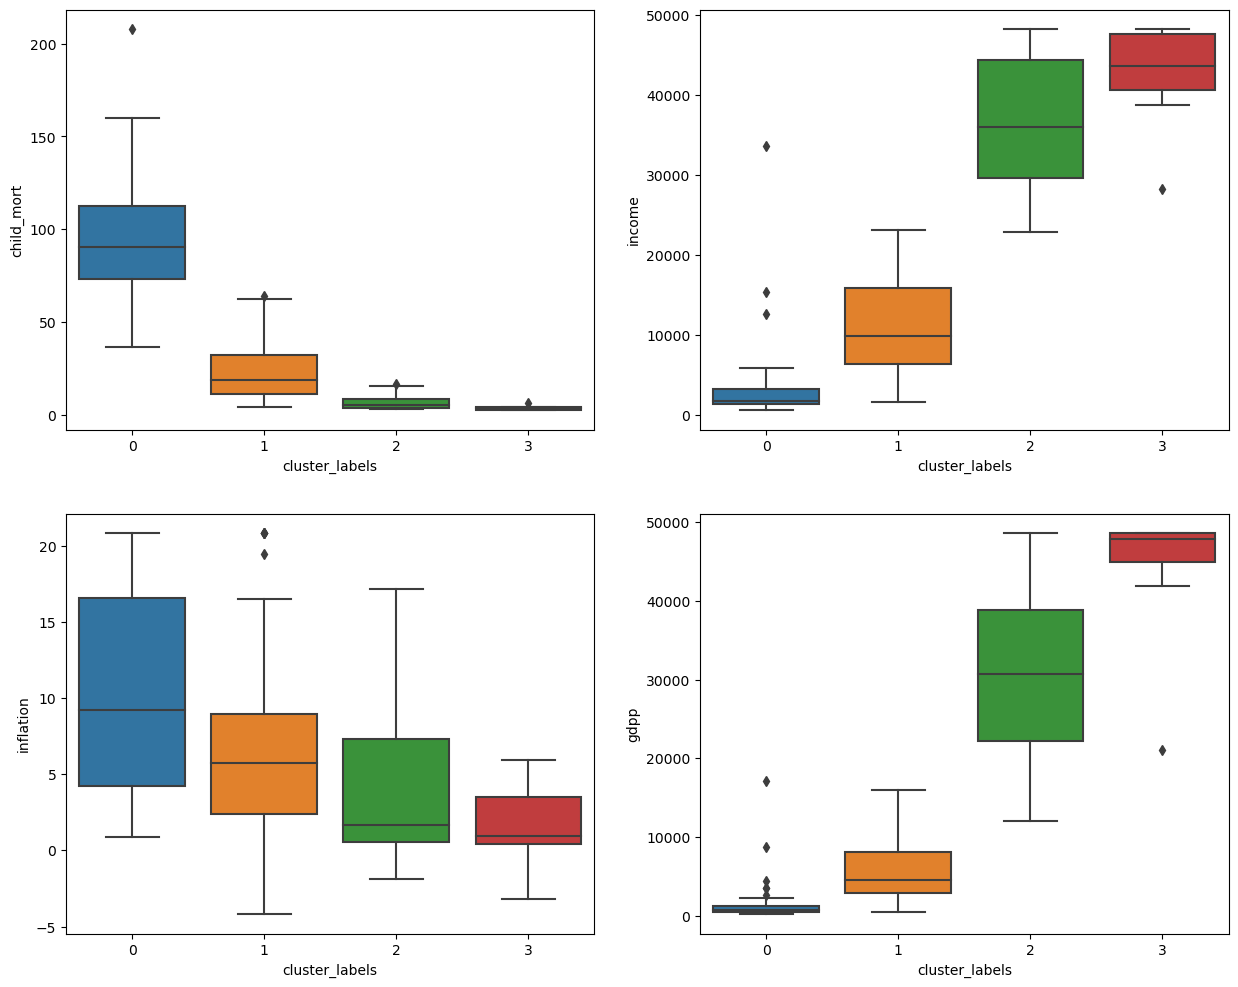

In [94]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'cluster_labels', y = 'child_mort', data = df,ax=axes[0][0])
sns.boxplot(x = 'cluster_labels', y = 'income', data = df,ax=axes[0][1])
sns.boxplot(x = 'cluster_labels', y = 'inflation', data=df,ax=axes[1][0])
sns.boxplot(x = 'cluster_labels', y = 'gdpp', data=df,ax=axes[1][1])
plt.show()

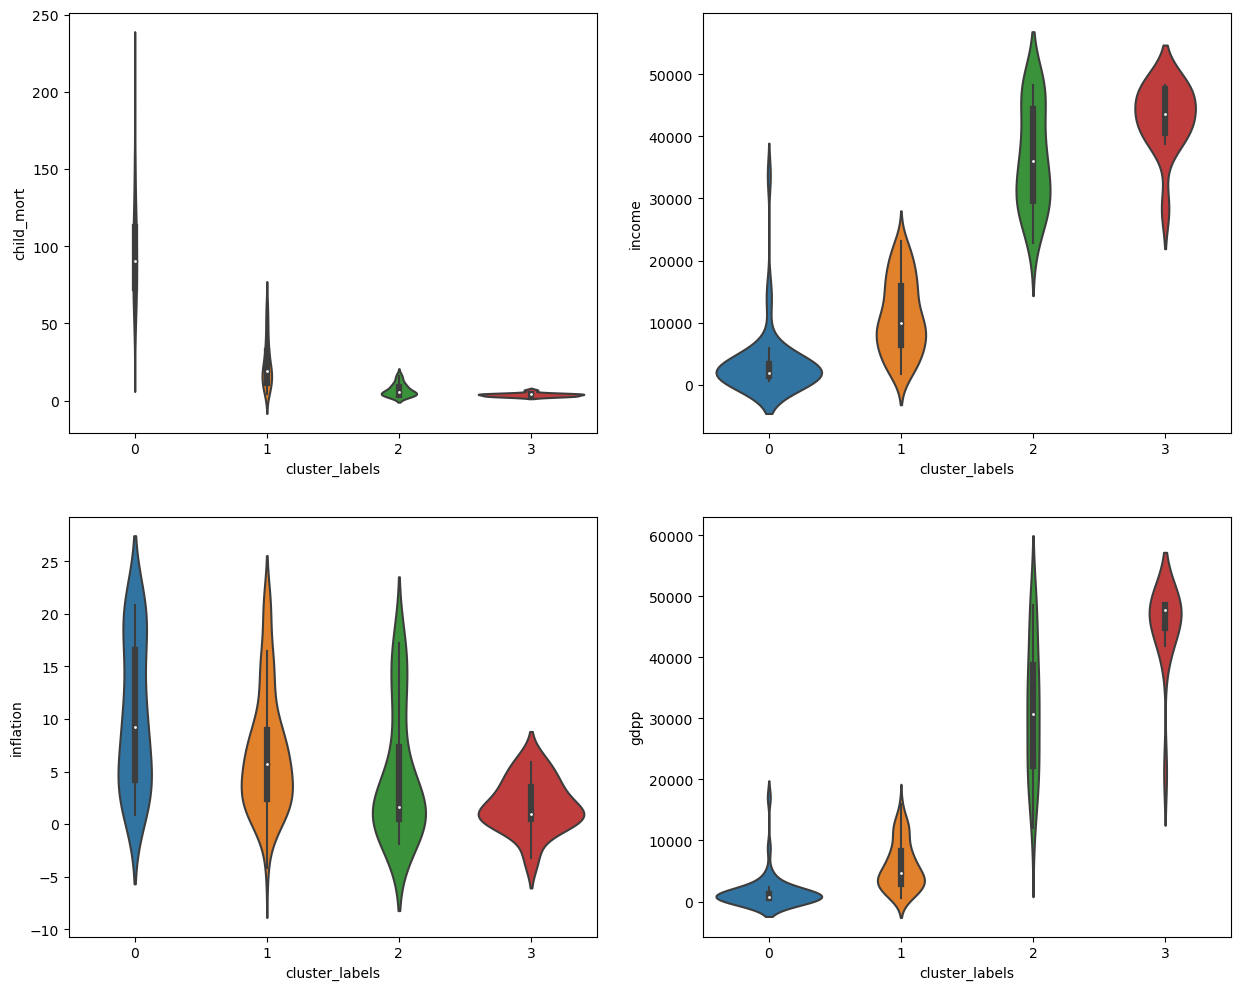

In [95]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'cluster_labels', y = 'child_mort', data = df,ax=axes[0][0])
sns.violinplot(x = 'cluster_labels', y = 'income', data = df,ax=axes[0][1])
sns.violinplot(x = 'cluster_labels', y = 'inflation', data=df,ax=axes[1][0])
sns.violinplot(x = 'cluster_labels', y = 'gdpp', data=df,ax=axes[1][1])
plt.show()

In [96]:
df.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer   gdpp  cluster_labels  
0       9.44        56.2      5.820    553               0  
1       4.49        76.3      1.650   4090               1  
2      16.10        76.5      2.890   4460               1  
3      20.87        60.1      5.861   3530               0  
4       1.44        76.8      2.130  12200               1

<AxesSubplot: xlabel='cluster_labels'>

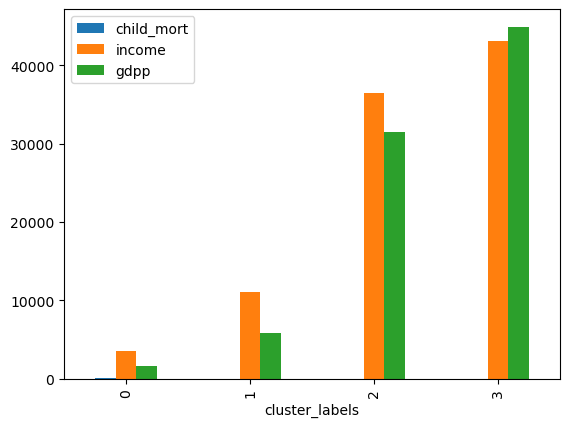

In [97]:
df.drop(['country', 'exports', 'health', 'imports', 'inflation', 'life_expec','total_fer'], axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')

Hierarchical Clustering with 3 clusters

Here, although the dendogram suggested 4 clusters, however we would go for 3 clusters only as 4 looks quite unnecessary as two of them could be merged together. So let's cut tree for 3 clusters.

In [98]:
cut_tree(mergings, n_clusters=3)

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [0],
       [0],
       [1],
       [0],
       [2],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [2],
       [2],
       [0],
       [0],
       [1],
       [2],
       [0],
       [2],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [2],
       [1],
       [1],
       [1],
       [0],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [0],
       [1],
       [2],
    

In [99]:
cluster_labels=cut_tree(mergings, n_clusters=3).reshape(-1, )

In [100]:
df_scaled.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -0.669581 -0.629435 -0.732729 -0.958349   0.394438   -1.819049   
1   -0.538949 -0.542172 -0.473489 -0.472182 -0.394006  -0.383226    0.674398   
2   -0.272833 -0.475838 -0.530017 -0.560152 -0.192552   1.440750    0.699208   
3    2.007808 -0.418960 -0.588935 -0.543087 -0.667360   2.190136   -1.335246   
4   -0.695634 -0.027134 -0.150685  0.306422  0.227992  -0.862393    0.736424   

   total_fer      gdpp  
0   2.016421 -0.757362  
1  -0.880535 -0.523321  
2  -0.019090 -0.498838  
3   2.044904 -0.560376  
4  -0.547072  0.013312

In [101]:
df.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer   gdpp  cluster_labels  
0       9.44        56.2      5.820    553               0  
1       4.49        76.3      1.650   4090               1  
2      16.10        76.5      2.890   4460               1  
3      20.87        60.1      5.861   3530               0  
4       1.44        76.8      2.130  12200               1

In [102]:
df['cluster_labels2']=cluster_labels

In [103]:
df.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer   gdpp  cluster_labels  cluster_labels2  
0       9.44        56.2      5.820    553               0                0  
1       4.49        76.3      1.650   4090               1                1  
2      16.10        76.5      2.890   4460               1                1  
3      20.87        60.1      5.861   3530               0                0  
4       1.44        76.8      2.130  12200               1                1

Visualisation of clusters for 3 clusters

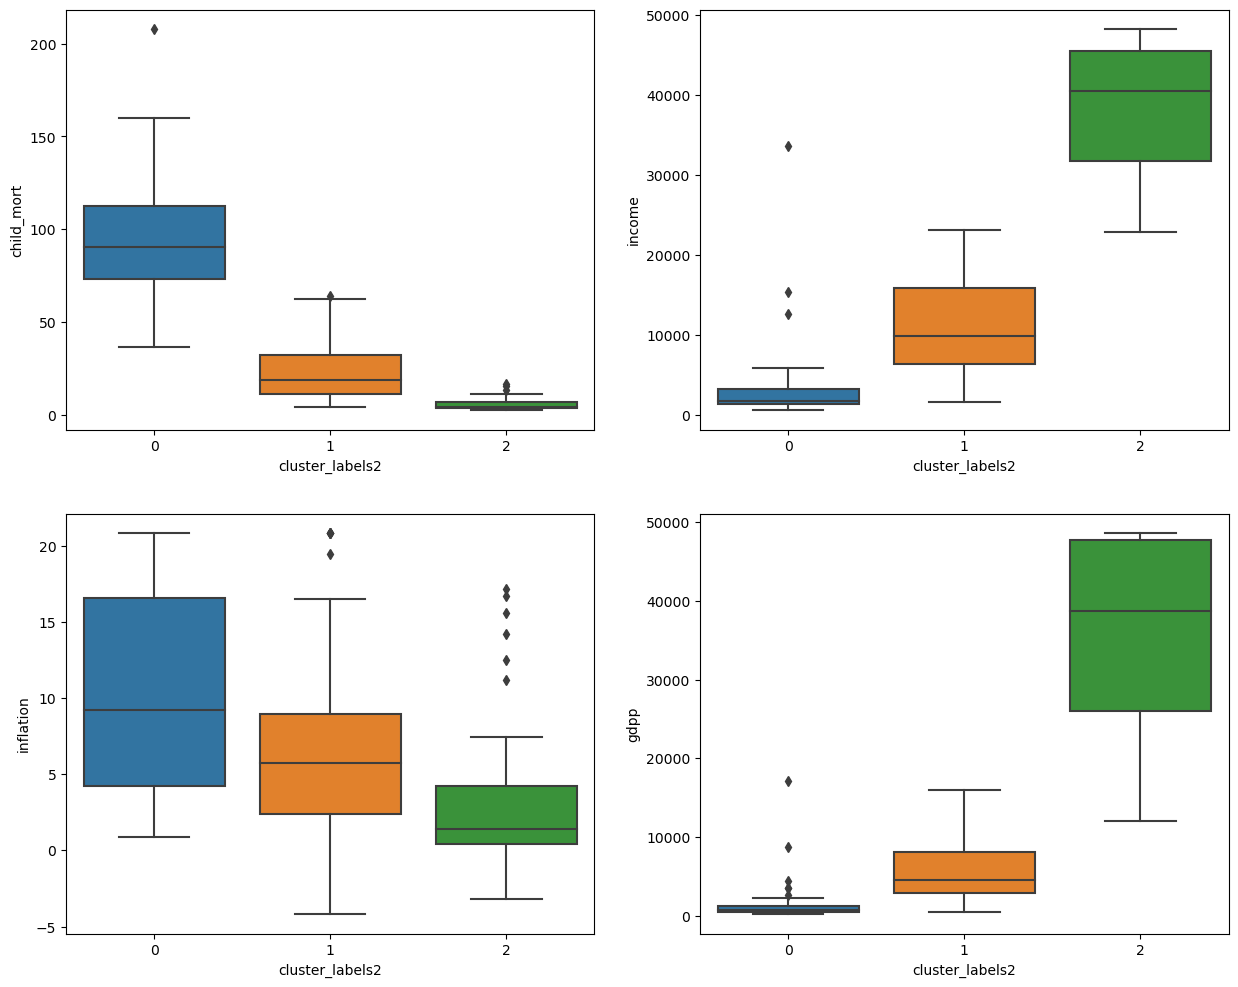

In [104]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'cluster_labels2', y = 'child_mort', data = df,ax=axes[0][0])
sns.boxplot(x = 'cluster_labels2', y = 'income', data = df,ax=axes[0][1])
sns.boxplot(x = 'cluster_labels2', y = 'inflation', data=df,ax=axes[1][0])
sns.boxplot(x = 'cluster_labels2', y = 'gdpp', data=df,ax=axes[1][1])
plt.show()

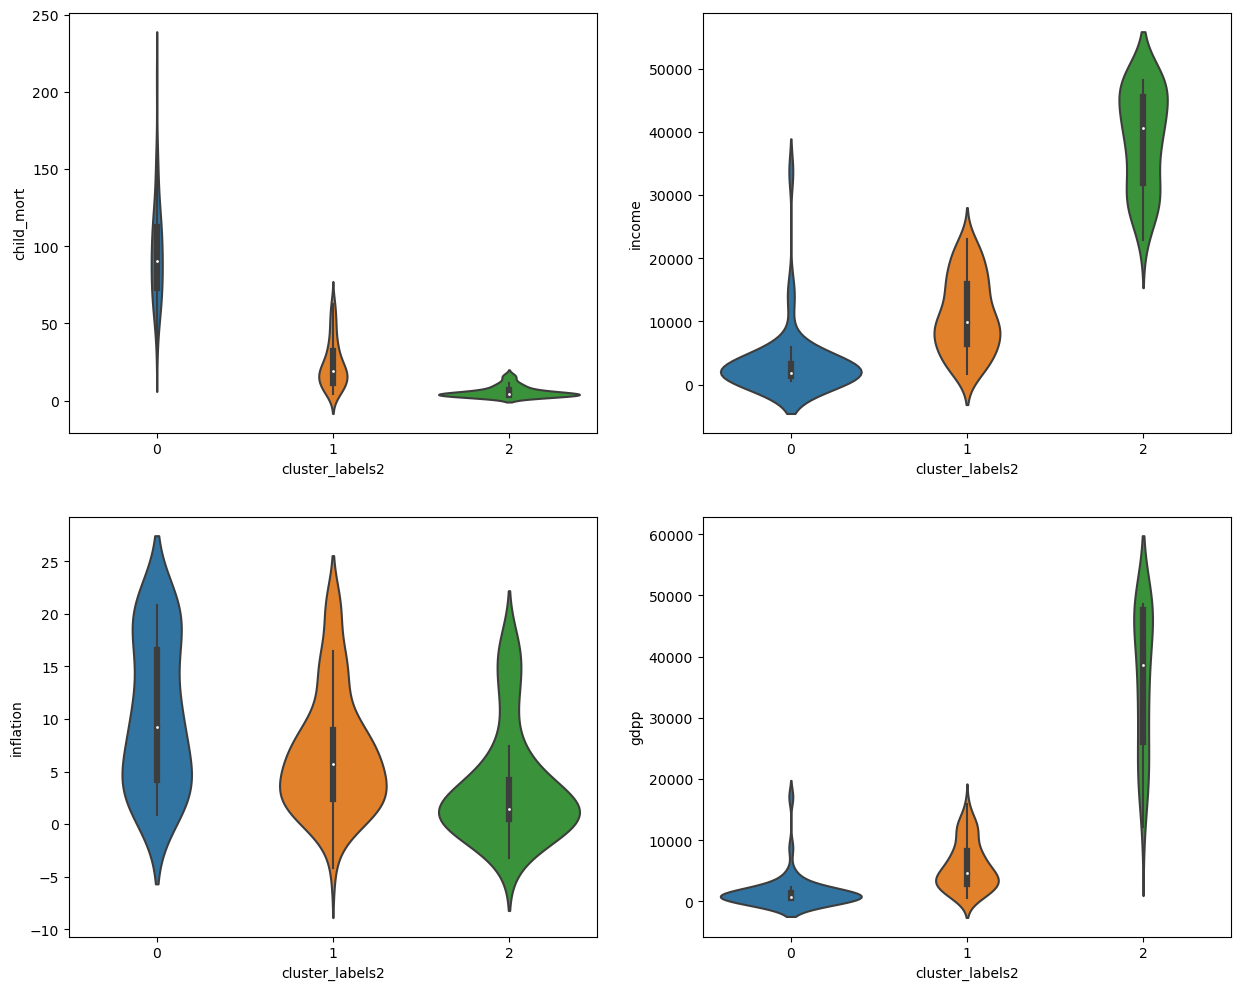

In [105]:
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'cluster_labels2', y = 'child_mort', data = df,ax=axes[0][0])
sns.violinplot(x = 'cluster_labels2', y = 'income', data = df,ax=axes[0][1])
sns.violinplot(x = 'cluster_labels2', y = 'inflation', data=df,ax=axes[1][0])
sns.violinplot(x = 'cluster_labels2', y = 'gdpp', data=df,ax=axes[1][1])
plt.show()

In [106]:
df.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer   gdpp  cluster_labels  cluster_labels2  
0       9.44        56.2      5.820    553               0                0  
1       4.49        76.3      1.650   4090               1                1  
2      16.10        76.5      2.890   4460               1                1  
3      20.87        60.1      5.861   3530               0                0  
4       1.44        76.8      2.130  12200               1                1

Cluster Profiling for 3 clusters

<AxesSubplot: xlabel='cluster_labels2'>

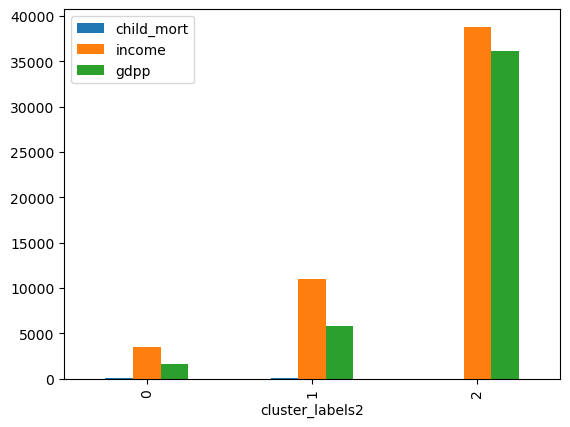

In [107]:
df.drop(['country', 'exports', 'health', 'imports', 'inflation', 'life_expec','total_fer', 'cluster_labels'], axis = 1).groupby('cluster_labels2').mean().plot(kind = 'bar')

Looking at these profiles , its quite evident that 3 clusters makes more sense and as per these visualisation, looks like cluster 0 is the one which needs aid due to their poor socio economic conditions. So we will try to sort the 5 countries from cluster 0 which are indirect for need of help.

In [108]:
df[df['cluster_labels2'] == 0].sort_values(by = ['child_mort', 'income', 'gdpp'], ascending = [False, True, True]).head(5)

country  child_mort  exports   health  imports  income  \
66                      Haiti       208.0  101.286  45.7442  428.314  1500.0   
132              Sierra Leone       160.0   67.032  52.2690  137.655  1220.0   
32                       Chad       150.0  330.096  40.6341  390.195  1930.0   
31   Central African Republic       149.0   52.628  17.7508  118.190   888.0   
97                       Mali       137.0  161.424  35.2584  248.508  1870.0   

     inflation  life_expec  total_fer  gdpp  cluster_labels  cluster_labels2  
66        5.45       55.78      3.330   662               0                0  
132      17.20       55.78      5.200   399               0                0  
32        6.39       56.50      5.861   897               0                0  
31        2.01       55.78      5.210   446               0                0  
97        4.37       59.50      5.861   708               0                0

CONCLUSION:-

We have analyzed both K-means with 3 clusters clustering with 3 clusters and found that the 5 countries in dire need of help suggested by botth these algorithm are same. So as per my analysis, the countries which are in dire need of aid are:

Haiti

Sierra Leone

Chad

Central African Republic

Mali

If we match the results with the bivariate analysis done previously, i can see that these 5 countries are actually among the list of 15 countries suggested by the bivariate analysis which had poor socio economic status, so the result looks good.